<a href="https://colab.research.google.com/github/emanueleiacca/Smoking-Drinking-analysis/blob/main/ML_team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛑 Machine Learnin Group Project

- Team members:
  - Vít Šesták (vit.sestak@opendeusto.es)
  - Emanuele Iaccarino (emanuele.iaccarino@opendeusto.es)
  - Gabriel Martins (gabriel.morais@opendeusto.es)
- Group Number: TBD
- Datasets:
  - Smoking and Drinking Dataset with Body Signal
  - Used Cars Dataset
- Date: 22.10.2023
- Time spent on the project: 8h TO-BE-UPDATED
- Main difficulties encountered in the development: TBD

# 🛑 Dataset description

Smoking & Drinking
- URL: https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset
- description: This dataset is collected from the National Health Insurance Service in Korea. All personal information and sensitive data were excluded.

Cars
- URL: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data
- description: The dataset contains most relevant information on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories. The data is scraped from Craigslist (the world's largest collection of used vehicles for sale).

Detailed description of the datasets, including a description of all features, is [here](https://docs.google.com/document/d/1SLMBdTBWHOi1eMQAjcA3WGJcAUScxrK8HgsyWi6KLmI/edit#heading=h.4r6z9679v89f).



---



# 🛑 Data Cleaning

Analyse the data in you dataset, provide a statistichal analysis, visualizations...

Clean and prepare the data, use the different methods seen in class.

First, we will load the dataset and have a look on the data.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive

# load dataset from drive
drive.mount('/content/drive')
path = "/content/drive/Shareddrives/Machine Learning/smoking_driking_dataset_Ver01.csv/smoking_driking_dataset_Ver01.csv"

# load from colab file system
#path = "smoking_driking_dataset_Ver01.csv"

# view a data sample
df = pd.read_csv(path)
df.head()

Mounted at /content/drive


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive

# load dataset from drive
drive.mount('/content/drive')
path = "/content/drive/Shareddrives/Machine Learning/smoking_driking_dataset_Ver01.csv/smoking_driking_dataset_Ver01.csv"

# load from colab file system
#path = "smoking_driking_dataset_Ver01.csv"

# view a data sample
df = pd.read_csv(path)
df.head()

In [ ]:
# check if exist some null data or duplicated data
print("Number of null data", df.isnull().sum())
print("Number of duplicated data ", df.duplicated().sum())


In [ ]:
# there is no null value, however there are some duplicated numbers
df.drop_duplicates(keep = "first",inplace = True)

Plot Numerical variables

In [ ]:
# Create box plots for Sight Left and Sight Right
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['sight_left', 'sight_right']])
plt.title('Box Plots for Vision Measurements')
plt.show()

In [ ]:
# Create box plots for Hearing Left and Hearing Right
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['hear_left', 'hear_right']])
plt.title('Box Plots for Hearing Measurements')
plt.show()


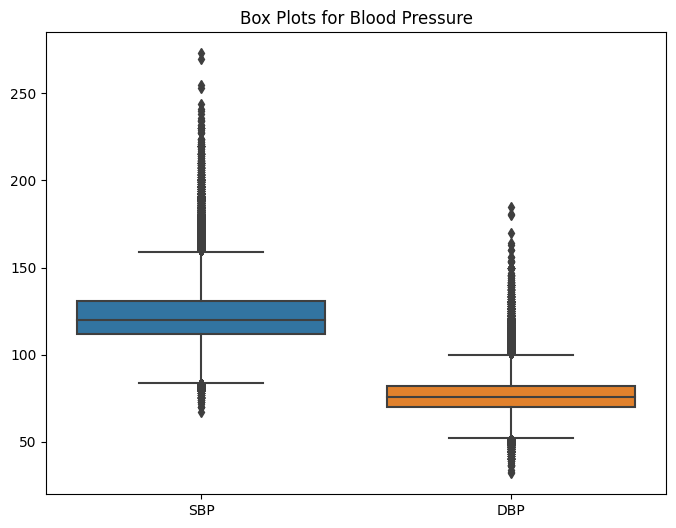

In [ ]:
# Create box plots for SBP and DBP
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['SBP', 'DBP']])
plt.title('Box Plots for Blood Pressure')
plt.show()


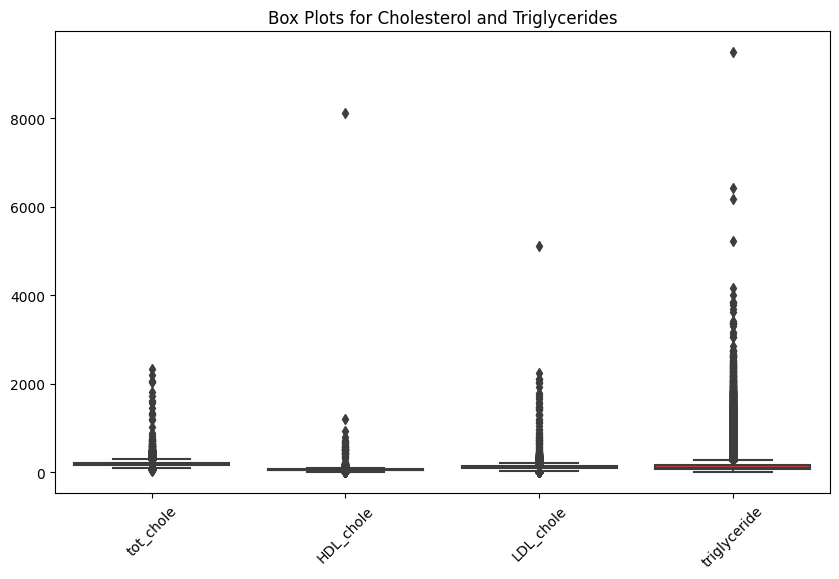

In [ ]:
# Create box plots for cholesterol and triglycerides
cholesterol_columns = ['tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[cholesterol_columns])
plt.title('Box Plots for Cholesterol and Triglycerides')
plt.xticks(rotation=45)
plt.show()


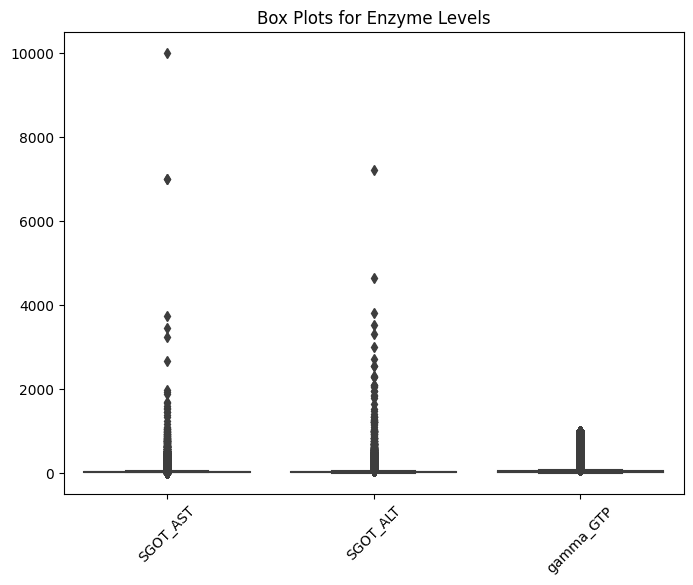

In [ ]:
# Create box plots for enzyme levels
enzyme_columns = ['SGOT_AST', 'SGOT_ALT', 'gamma_GTP']
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[enzyme_columns])
plt.title('Box Plots for Enzyme Levels')
plt.xticks(rotation=45)
plt.show()


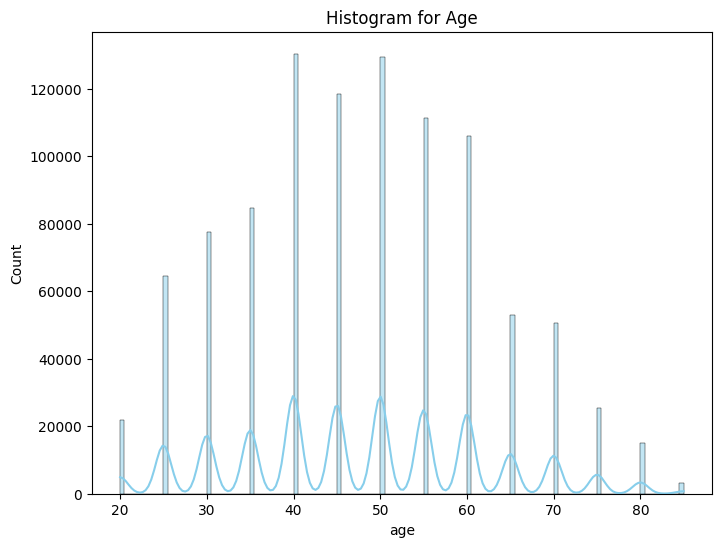

In [ ]:
# Create a histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', kde=True, color='skyblue')
plt.title('Histogram for Age')
plt.show()


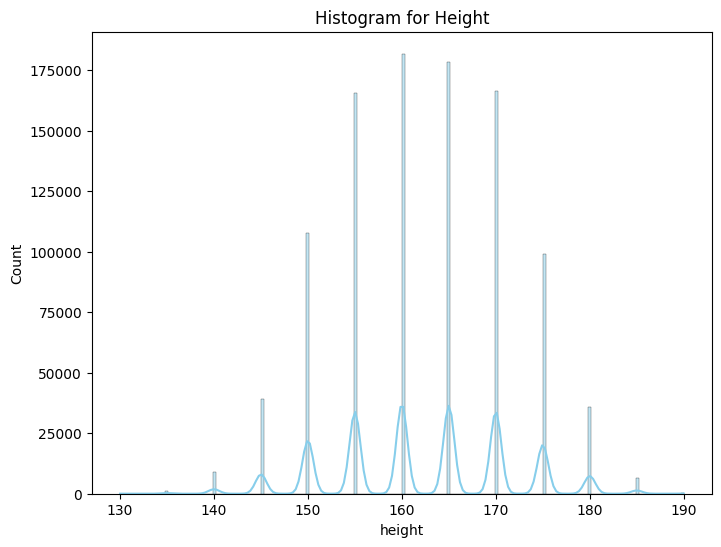

In [ ]:
# Create a histogram for Height
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='height', kde=True, color='skyblue')
plt.title('Histogram for Height')
plt.show()


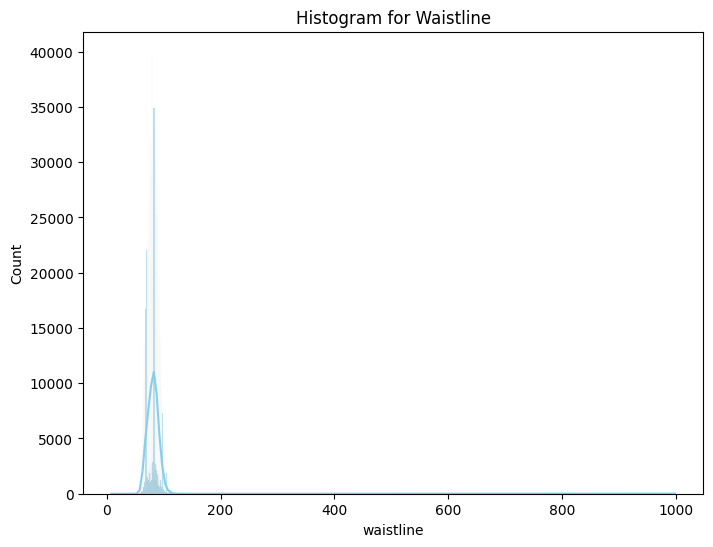

In [ ]:
# Create a histogram for Waistline
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='waistline', kde=True, color='skyblue')
plt.title('Histogram for Waistline')
plt.show()


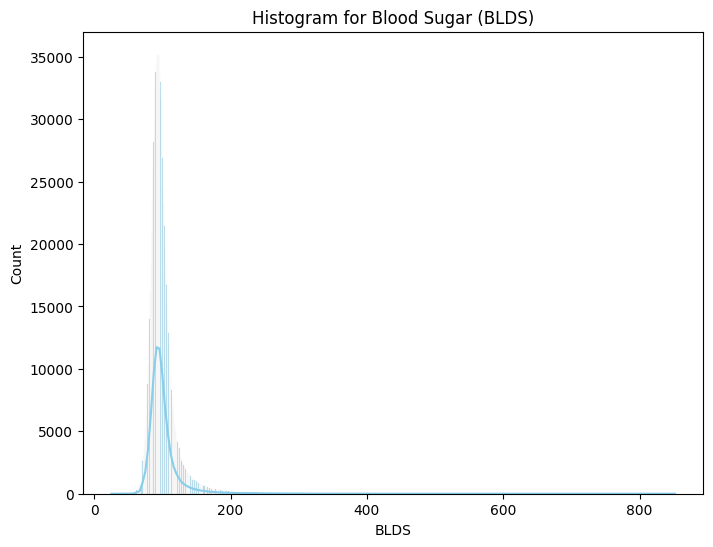

In [ ]:
# Create a histogram for Blood Sugar (BLDS)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='BLDS', kde=True, color='skyblue')
plt.title('Histogram for Blood Sugar (BLDS)')
plt.show()


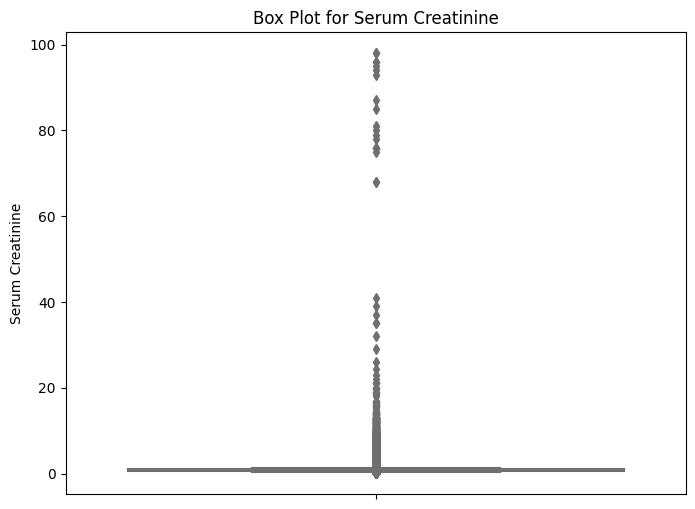

In [ ]:
# Create a histogram for Serum Creatinine
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='serum_creatinine', color='skyblue')
plt.title('Box Plot for Serum Creatinine')
plt.ylabel('Serum Creatinine')
plt.show()


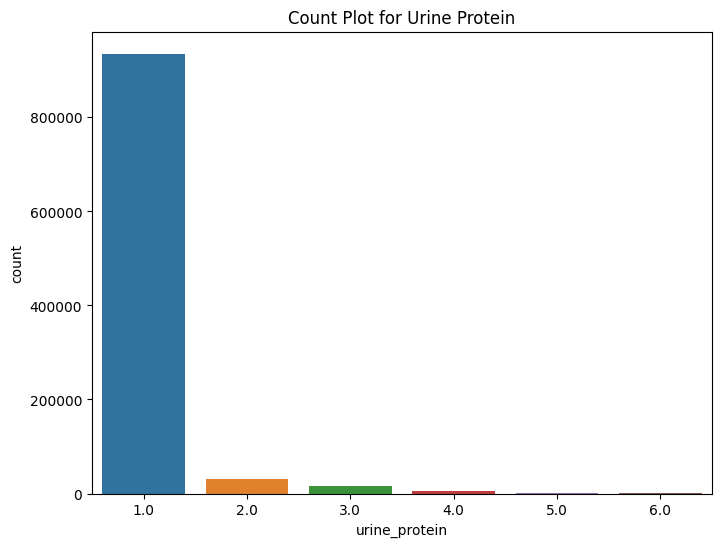

In [ ]:
# Create a count plot for Urine Protein
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='urine_protein')
plt.title('Count Plot for Urine Protein')
plt.show()


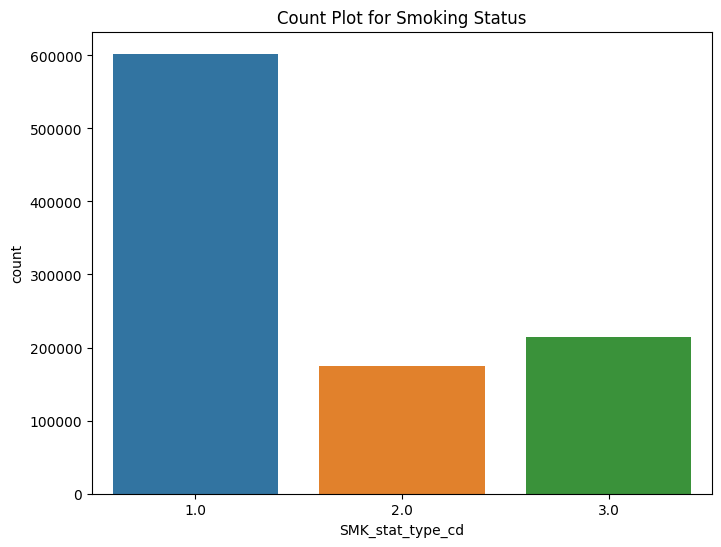

In [ ]:
# Create a count plot for Smoking Status (SMK_stat_type_cd)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SMK_stat_type_cd')
plt.title('Count Plot for Smoking Status')
plt.show()


Plot categorical variables

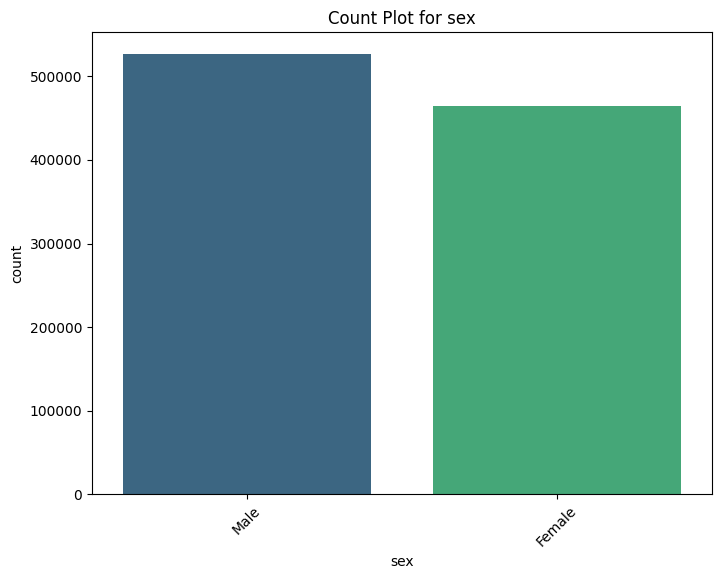

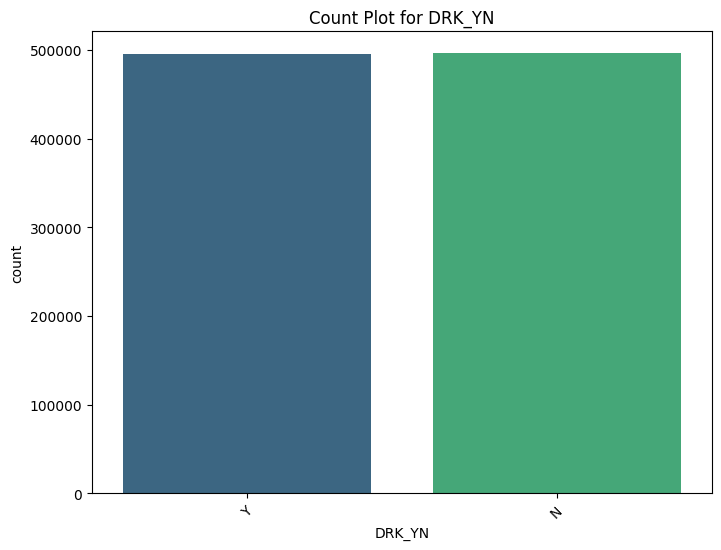

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Count Plot for {column}')
    plt.xticks(rotation=45)
    plt.show()


Correlation Matrix

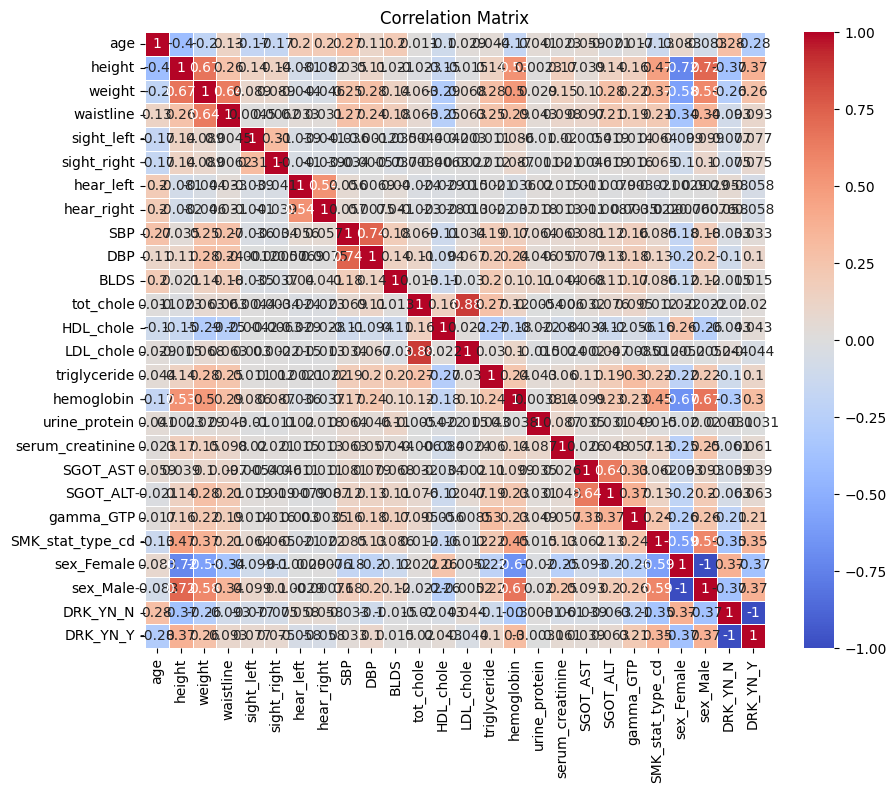

In [ ]:
# to use the correlation matrix we need to transform our data into numerical
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# correlation matrix
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In the correlation matrix there are many interesting relations:
- some of them are quite obvious and confirm our common expectations:
  - positive correlation between *Height* and *Weight*
  - positive correlation between *Waistline* and *Weight*
  - positive correlation between *Male* and *Weight*
  - positive correlation between *Male* and *Height*
  - negative correlation between *Age* and *Height*
  - negative correlation between *HDL Cholesterol* and *Weight*
  - negative correlation between *Female* and *Weight*
  - negative correlation between *Female* and *Height*

But there are some other interesting and not so obvious relations worth analyzing.

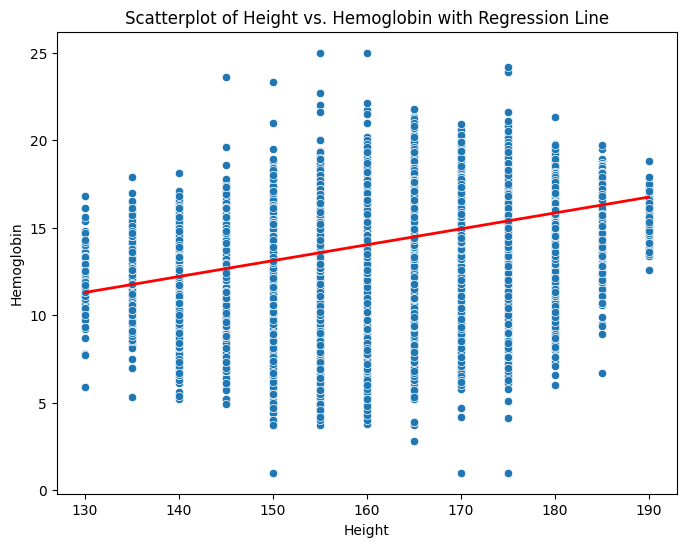

In [ ]:
# relation between Height and Hemoglobin
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['height'], y=df['hemoglobin'])
sns.regplot(x=df['height'], y=df['hemoglobin'], scatter=False, color='red', line_kws={"linewidth": 2})
plt.title("Scatterplot of Height vs. Hemoglobin with Regression Line")
plt.xlabel("Height")
plt.ylabel("Hemoglobin")
plt.show()

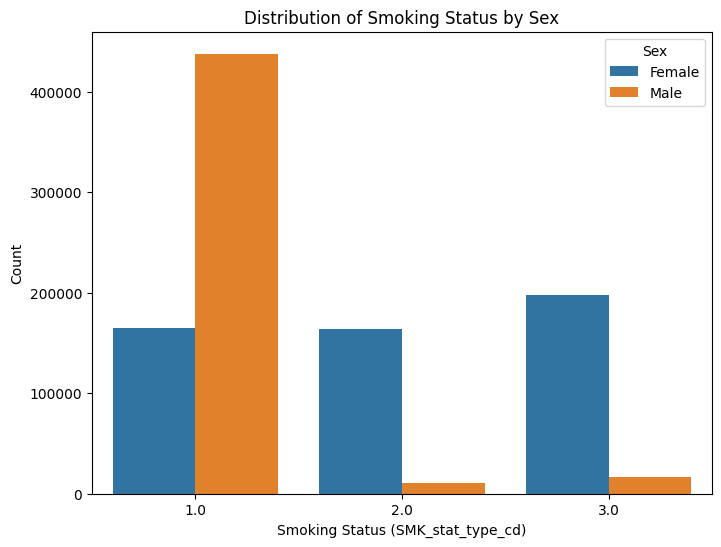

In [ ]:
# relation between Smoking Status and Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='SMK_stat_type_cd', hue='sex', data=df)
plt.title("Distribution of Smoking Status by Sex")
plt.xlabel("Smoking Status (SMK_stat_type_cd)")
plt.ylabel("Count")
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

# smoking state (1.0 = never smoked, 2.0 = used to smoke, 3.0 = still smoke)

The results here are quite interesting, since we did not suppose such distribution of the *Smoking Status* feature between males and females.

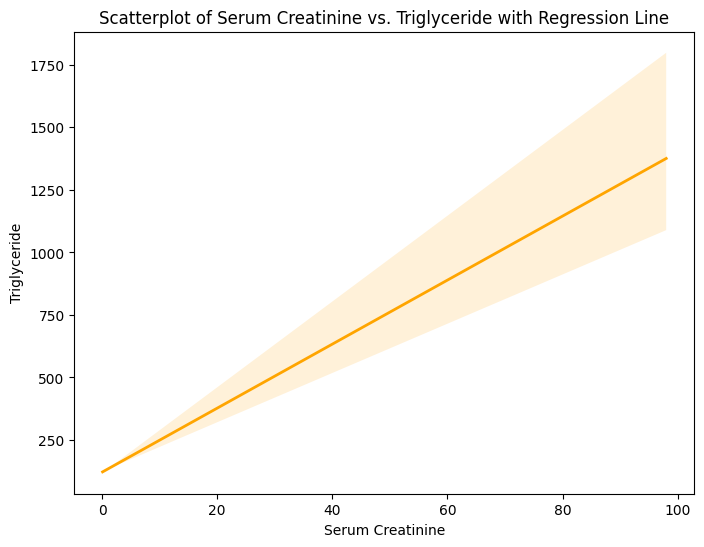

In [ ]:
# relation between Serum Creatinine and Triglyceride
plt.figure(figsize=(8, 6))
sns.regplot(x=df['serum_creatinine'], y=df['triglyceride'], scatter=False, color='orange', line_kws={"linewidth": 2})
plt.title("Scatterplot of Serum Creatinine vs. Triglyceride with Regression Line")
plt.xlabel("Serum Creatinine")
plt.ylabel("Triglyceride")
plt.show()


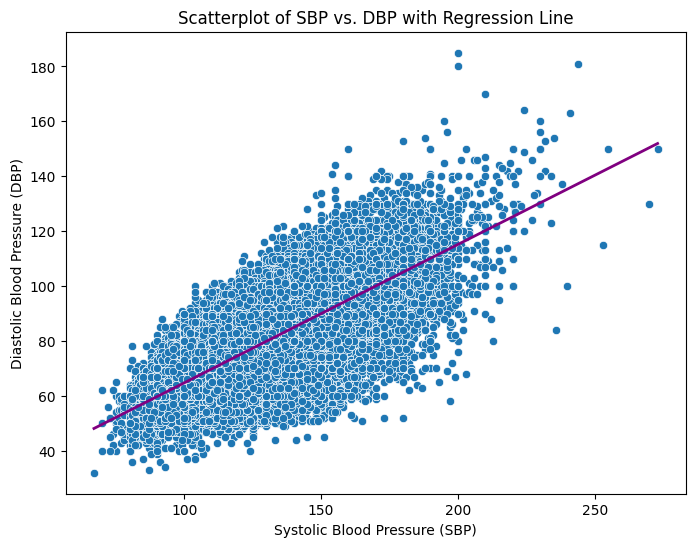

In [ ]:
# relation between SBP and DBP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['SBP'], y=df['DBP'])
sns.regplot(x=df['SBP'], y=df['DBP'], scatter=False, color='purple', line_kws={"linewidth": 2})
plt.title("Scatterplot of SBP vs. DBP with Regression Line")
plt.xlabel("Systolic Blood Pressure (SBP)")
plt.ylabel("Diastolic Blood Pressure (DBP)")
plt.show()

We can use PCA with two dimension to have a full understanding of our dataset and eventually finding out if we have outliers that need to be removed.
Additionally doing a PCA in this case help us understand if there is a clear division between the target variables

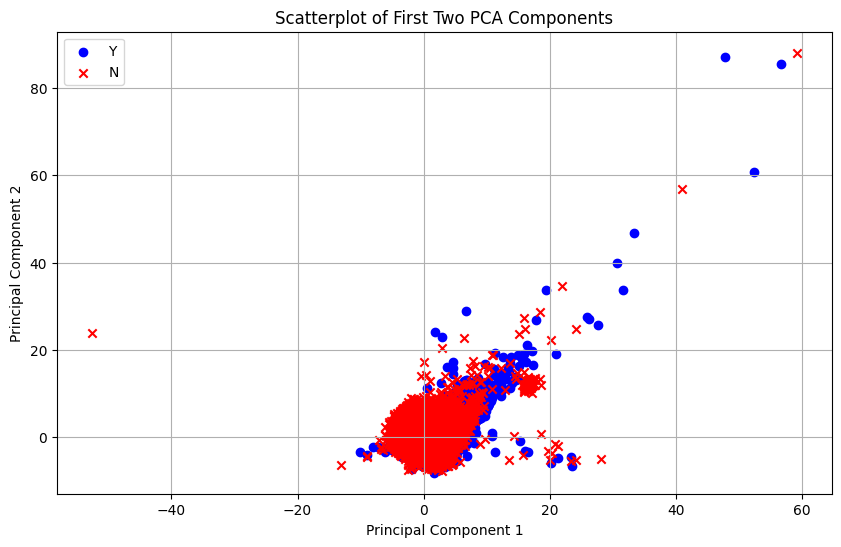

In [ ]:
'''
Before creating the model we need to transform the categorical variables into numerical
(one hot encoding) or dummies (label encoding). There is a little difference between
the two method in our results, usually OHE is used when you have ordinal number because
you give to your data a sequence so putting it from higher to lower. Using dummies instead
give to all possible outcome of a variable the same value'''

# in this case we use dummies
X = df.drop(columns=['DRK_YN'])
X = pd.get_dummies(X)
y = df['DRK_YN']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y == 'Y', 0], X_pca[y == 'Y', 1], c='b', marker='o', label='Y')
plt.scatter(X_pca[y == 'N', 0], X_pca[y == 'N', 1], c='r', marker='x', label='N')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of First Two PCA Components')
plt.legend()
plt.grid(True)
plt.show()

Before giving any conclusion, to have a full picture of our data with need to understand how much variance each PC explain.

First of all, we are lucky to say that there are not enough outliers data to proceed with an outlier detection technique like Z-score or Isolation Forest. Usually outliers detection brings a loss of information and decrease of the performing model quality so we will leave the dataset as it is.
For what concern the partition of our target variable we can see that the pattern is not completely clear so we can't suppose our classification model to perform his task with a high accurancy like e.g. the Toy Dataset from scikit-learn.

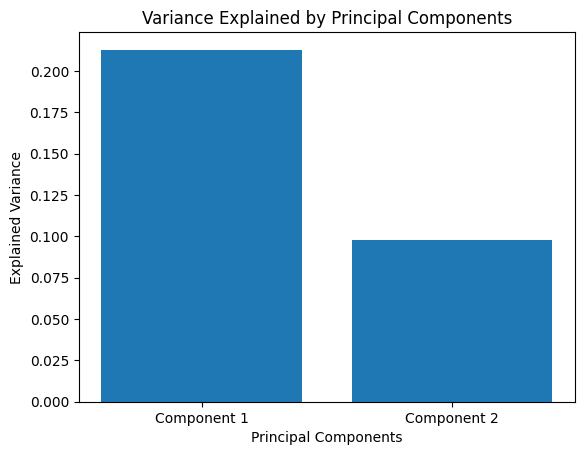

In [ ]:
explained_variance = pca.explained_variance_ratio_
plt.figure()
plt.bar(range(2), explained_variance, tick_label=['Component 1', 'Component 2'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Variance Explained by Principal Components')
plt.show()



---



# 🛑 Task 1: Classification

For each task:
*   Use the different algorithms that we have seen in class to solve it.
*   Use multiple hyperparameter configurations for each algorithm and find the
best one for your problem.
*   Use multiple hyperparameter configurations for each algorithm and find the
best one for your problem.
*   Evaluate the different algorithms and configurations using the metrics that we have seen in class.
*   Select the best solution.
*   Discuss why is the best solution and extract conclusions.

**Not doing this for each task will result in failing that task.**

The most important part for me is for you to show your reasoning
process and to discuss each step. That is what I will look at when
evaluating the project.


Classification algorithms to be examined:
1. Decision Trees
  - Single Tree
  - Random Forest
2. Naive Bayes
3. Support Vector Machines

We will use GridSearch and Optuna for hyperparams optimization.

First, we need to see what the data looks like. Is it linear separable or non-linear separable?

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.preprocessing import StandardScaler

# replace string values with numerical values
df_encoded = df.copy()

df_encoded['sex'] = df_encoded['sex'].map({'Male': 0, 'Female': 1})
df_encoded['DRK_YN'] = df_encoded['DRK_YN'].map({'N': 0, 'Y': 1})

# separate features and target columns
columns_to_drop = ['SMK_stat_type_cd', 'DRK_YN']

X = df_encoded.drop(columns=columns_to_drop, axis=1)
y_smoke = df_encoded['SMK_stat_type_cd']
y_drink = df_encoded['DRK_YN']

# check that there are no missing values
missing_rows = df_encoded.isnull().any(axis=1).sum()
print("missing rows: ", missing_rows)

accs = []

for target in [y_smoke, y_drink]:
  # split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

  # now we can perform classification using a decision tree from sklearn
  # by default uses an optimized version of the CART algorithm
  clf = DecisionTreeClassifier(max_depth=5000, min_samples_split=10, random_state=42)

  # scale features
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # train the classifier
  clf.fit(X_train, y_train)

  # visualize tree commented - takes a long time
  # plot_tree(clf)

  # predict using the trained model
  y_pred = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  accs.append(accuracy)

for i in range(len(accs)):
  print(f"smoking accuracy: {accs[i]}" if i == 0 else f"drinking accuracy: {accs[i]}")

missing rows:  0
smoking accuracy: 0.6318252887476673
drinking accuracy: 0.6430473596610682


We can see that the obtained results are not very satisfying. Let's see whether it improves if we try the same with RandomForest classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for target in [y_smoke, y_drink]:
  X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

  clf = RandomForestClassifier(n_estimators=75)

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"accuracy: {accuracy}")

KeyboardInterrupt: ignored

We can see that the results are a little bit better but still far from perfect. Let's try something different that decision trees - NaiveBayes!

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# create a Naive Bayes classifier
mnb = MultinomialNB()

# don't scale because mnb cannot work with negative values
# use cross validation score
accs_smoking = cross_val_score(mnb, X, y_smoke, cv=KFold(n_splits=100, shuffle=True, random_state=0), scoring='accuracy')
accs_drinking = cross_val_score(mnb, X, y_drink, cv=KFold(n_splits=100, shuffle=True, random_state=0), scoring='accuracy')

print("smoking average accuracy: ", sum(accs_smoking) / len(accs_smoking))
print("drinking average accuracy: ", sum(accs_drinking) / len(accs_drinking))

Still bad. Let's try Gassian classifier.

In [ ]:
# create a Gaussian classifier
gnb = GaussianNB()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# use cross validation score
accs_smoking = cross_val_score(gnb, X_scaled, y_smoke, cv=KFold(n_splits=100, shuffle=True, random_state=0), scoring='accuracy')
accs_drinking = cross_val_score(gnb, X_scaled, y_drink, cv=KFold(n_splits=100, shuffle=True, random_state=0), scoring='accuracy')

print("smoking average accuracy: ", sum(accs_smoking) / len(accs_smoking))
print("drinking average accuracy: ", sum(accs_drinking) / len(accs_drinking))

Now let's try the improve the results with Support Vector Machines (SVM).

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

for target in [y_smoke, y_drink]:
  X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  svm = SVC(kernel="rbf", random_state=42)
  svm.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  accuracy



We can also try another linear model classifier Stochastic Gradient Descent (SGD). It allows for better scalability and efficiency with large datasets. It approximates the standard SVM using stochastic gradient descent.

In [ ]:
from sklearn.linear_model import SGDClassifier

for target in [y_smoke, y_drink]:
  X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # create an instance of SGDClassifier for linear SVM
  svm_clf = SGDClassifier(loss='hinge', random_state=42)

  svm_clf.fit(X_train, y_train)

  y_pred = svm_clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)

0.666817975487971
0.6870429212689767


Let's try to tune it a little bit.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'eta0': [0.01, 0.1, 0.5]
}

for target in [y_smoke, y_drink]:
  X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # create an instance of SGDClassifier for linear SVM
  svm_clf = SGDClassifier(loss='hinge', random_state=42)

  # Perform GridSearch
  grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_
  best_score = grid_search.best_score_

  print(best_params)
  print(best_score)

{'alpha': 0.0001, 'eta0': 0.01, 'penalty': 'elasticnet'}
0.668831235957511
{'alpha': 0.0001, 'eta0': 0.01, 'penalty': 'elasticnet'}
0.7037799777710585


We want to try to maximize the performance of the Random Forest algorithm as well, to do so we need to tune the hyperparameters. Since the process will be too long with GridSearchCV we'll use Optuna that is more efficient. More info about the library can be found here: https://optuna.org/. More specifically we are gonna use Bayesian hyperparameter optimization algorithms that are able to learn about the relationship between the hyperparameters and the objective function, and it can use this information to more efficiently explore the search space and find better hyperparameters.



In [ ]:
#Smoke Y/N
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_smoke)
y = encoder.transform(y_smoke)

In [ ]:
#Drink Y/N
encoder = LabelEncoder()
encoder.fit(y_drink)
y = encoder.transform(y_drink)

In [ ]:
#!pip install optuna

import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import optuna

def evaluate_model(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'random_state': 42,
    }

    rf_classifier = RandomForestClassifier(**params)
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return -accuracy

sampler = optuna.samplers.TPESampler()

study = optuna.create_study(sampler=sampler)
study.optimize(evaluate_model, n_trials=100)

best_trial = study.best_trial

best_n_estimators = best_trial.params["n_estimators"]
#[I 2023-11-09 23:57:41,610] Trial 31 finished with value: -0.6993392848136379 and parameters: {'n_estimators': 268, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 31 with value: -0.6993392848136379.
#[I 2023-11-10 09:00:46,616] Trial 59 finished with value: -0.7296716598577697 and parameters: {'n_estimators': 286, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 59 with value: -0.7296716598577697.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.2 MB/s eta 0:00:00


[I 2023-11-10 03:32:16,993] A new study created in memory with name: no-name-c06934d4-ea71-4ddd-8115-ea17f4360130
[I 2023-11-10 03:36:52,259] Trial 0 finished with value: -0.7177434811116155 and parameters: {'n_estimators': 269, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 0 with value: -0.7177434811116155.
[I 2023-11-10 03:40:40,856] Trial 1 finished with value: -0.7094315831946336 and parameters: {'n_estimators': 281, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: -0.7177434811116155.
[I 2023-11-10 03:42:58,466] Trial 2 finished with value: -0.7232006859333232 and parameters: {'n_estimators': 116, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 2 with value: -0.7232006859333232.
[I 2023-11-10 03:45:35,933] Trial 3 finished with value: -0.7099914258334594 and parameters: {'n_estimators': 190, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 2 with 

*The running time is more than 2 hours. Therefore, we print the output here to let you understand the steps that Optuna performed and the results that it obtained:*




Let's try to replace RandomForestClassifier with LGMBClassifier. It is known for its high speed and efficiency. It uses a histogram-based algorithm that bins continuous feature values into discrete bins. This results in faster training times compared to other boosting algorithms, especially on large datasets.

In [ ]:
#Smoke Y/N
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_smoke)
y = encoder.transform(y_smoke)

In [ ]:
#Drink Y/N
encoder = LabelEncoder()
encoder.fit(y_drink)
y = encoder.transform(y_drink)

In [ ]:
!pip install optuna
!pip install lightgbm

import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split

def evaluate_model(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y_smoke, test_size=0.2, random_state=42)

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 42
    }

    lgbm_classifier = lgb.LGBMClassifier(**params)
    lgbm_classifier.fit(X_train, y_train)

  # Make predictions on the test data.
    y_pred = lgbm_classifier.predict(X_test)

  # Calculate the accuracy.
    accuracy = accuracy_score(y_test, y_pred)

    return -accuracy

# Create a Bayesian hyperparameter optimization algorithm.
sampler = optuna.samplers.TPESampler()

# Optimize the hyperparameters of the Random Forest Classifier using TPE.
study = optuna.create_study(sampler=sampler)
study.optimize(evaluate_model, n_trials=100)

# Get the best hyperparameters.
best_trial = study.best_trial

best_n_estimators = best_trial.params["n_estimators"]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.2 MB/s eta 0:00:00


[I 2023-11-12 04:22:35,554] A new study created in memory with name: no-name-246e64fe-2f4a-492c-b209-6882ff8c3bb3


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.269837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:23:47,564] Trial 0 finished with value: -0.7019025138199573 and parameters: {'n_estimators': 224, 'learning_rate': 0.16894668720589273, 'max_depth': 11, 'min_child_samples': 19, 'subsample': 0.8489981470057142, 'colsample_bytree': 0.7774987213156634, 'reg_alpha': 0.09403327266977712, 'reg_lambda': 0.9597113385097952}. Best is trial 0 with value: -0.7019025138199573.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.169748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:26:03,758] Trial 1 finished with value: -0.7019579954000726 and parameters: {'n_estimators': 257, 'learning_rate': 0.03714250595553655, 'max_depth': 11, 'min_child_samples': 33, 'subsample': 0.867445959184016, 'colsample_bytree': 0.9350159206241782, 'reg_alpha': 0.5700579280571869, 'reg_lambda': 0.281496754599871}. Best is trial 1 with value: -0.7019579954000726.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.181823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:27:18,933] Trial 2 finished with value: -0.7022303595206392 and parameters: {'n_estimators': 190, 'learning_rate': 0.1069805728075591, 'max_depth': 8, 'min_child_samples': 24, 'subsample': 0.9319914685774651, 'colsample_bytree': 0.8618693975517495, 'reg_alpha': 0.9216623301975992, 'reg_lambda': 0.09746552620013005}. Best is trial 2 with value: -0.7022303595206392.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:29:04,934] Trial 3 finished with value: -0.7014737925190655 and parameters: {'n_estimators': 220, 'learning_rate': 0.030124320657092557, 'max_depth': 11, 'min_child_samples': 43, 'subsample': 0.8040360406118483, 'colsample_bytree': 0.6045341490217263, 'reg_alpha': 0.7591645879503014, 'reg_lambda': 0.5010238324311811}. Best is trial 2 with value: -0.7022303595206392.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.163113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:30:03,911] Trial 4 finished with value: -0.6947706088851229 and parameters: {'n_estimators': 119, 'learning_rate': 0.018303647285339432, 'max_depth': 7, 'min_child_samples': 32, 'subsample': 0.8971798610979987, 'colsample_bytree': 0.6774675179762177, 'reg_alpha': 0.5118847456184393, 'reg_lambda': 0.8549498342728017}. Best is trial 2 with value: -0.7022303595206392.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.275462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:31:12,416] Trial 5 finished with value: -0.6955372634467175 and parameters: {'n_estimators': 142, 'learning_rate': 0.016147841226022946, 'max_depth': 9, 'min_child_samples': 48, 'subsample': 0.9172523480608393, 'colsample_bytree': 0.6651845420154706, 'reg_alpha': 0.06201798470898956, 'reg_lambda': 0.9545329034467768}. Best is trial 2 with value: -0.7022303595206392.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.118466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:32:38,033] Trial 6 finished with value: -0.7024169793810273 and parameters: {'n_estimators': 200, 'learning_rate': 0.0649221507046844, 'max_depth': 9, 'min_child_samples': 47, 'subsample': 0.9645086026036641, 'colsample_bytree': 0.9840222385684914, 'reg_alpha': 0.5287471929366101, 'reg_lambda': 0.7839519552737615}. Best is trial 6 with value: -0.7024169793810273.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.278311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 04:34:25,223] Trial 7 finished with value: -0.6995319372150264 and parameters: {'n_estimators': 251, 'learning_rate': 0.018348888975288986, 'max_depth': 5, 'min_child_samples': 40, 'subsample': 0.8281959311868994, 'colsample_bytree': 0.6319884067494311, 'reg_alpha': 0.9082448963248467, 'reg_lambda': 0.11534470441712141}. Best is trial 6 with value: -0.7024169793810273.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.264371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:35:22,582] Trial 8 finished with value: -0.7023867167009644 and parameters: {'n_estimators': 115, 'learning_rate': 0.07487926269323954, 'max_depth': 11, 'min_child_samples': 46, 'subsample': 0.9030560142872277, 'colsample_bytree': 0.8369968357208287, 'reg_alpha': 0.7182873984068662, 'reg_lambda': 0.4075370062804239}. Best is trial 6 with value: -0.7024169793810273.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.173002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:37:37,601] Trial 9 finished with value: -0.6997790824355405 and parameters: {'n_estimators': 258, 'learning_rate': 0.014178948733054432, 'max_depth': 9, 'min_child_samples': 45, 'subsample': 0.9446068335638096, 'colsample_bytree': 0.8365760704856542, 'reg_alpha': 0.47106552999416995, 'reg_lambda': 0.7232088447417578}. Best is trial 6 with value: -0.7024169793810273.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.172313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:39:48,734] Trial 10 finished with value: -0.702321147560828 and parameters: {'n_estimators': 298, 'learning_rate': 0.05386100402496085, 'max_depth': 15, 'min_child_samples': 12, 'subsample': 0.9960889391997146, 'colsample_bytree': 0.9985102016145901, 'reg_alpha': 0.3004023745952479, 'reg_lambda': 0.6600547245982977}. Best is trial 6 with value: -0.7024169793810273.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.167038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:41:09,262] Trial 11 finished with value: -0.7016200621393698 and parameters: {'n_estimators': 164, 'learning_rate': 0.06526102137784097, 'max_depth': 13, 'min_child_samples': 38, 'subsample': 0.9578313685604797, 'colsample_bytree': 0.9315850662265459, 'reg_alpha': 0.6821949291614993, 'reg_lambda': 0.45044163151634414}. Best is trial 6 with value: -0.7024169793810273.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.286145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:42:01,383] Trial 12 finished with value: -0.7023362789008595 and parameters: {'n_estimators': 107, 'learning_rate': 0.07616051436174162, 'max_depth': 13, 'min_child_samples': 48, 'subsample': 0.8878777328368173, 'colsample_bytree': 0.7654014698682958, 'reg_alpha': 0.7130196800275712, 'reg_lambda': 0.5427703993176045}. Best is trial 6 with value: -0.7024169793810273.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.274687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 04:43:13,806] Trial 13 finished with value: -0.7021647903805027 and parameters: {'n_estimators': 167, 'learning_rate': 0.09565790683057357, 'max_depth': 6, 'min_child_samples': 50, 'subsample': 0.9781921460281344, 'colsample_bytree': 0.9949630822086333, 'reg_alpha': 0.37190426418185574, 'reg_lambda': 0.30624064212279933}. Best is trial 6 with value: -0.7024169793810273.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.276573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:44:28,709] Trial 14 finished with value: -0.7015040551991284 and parameters: {'n_estimators': 136, 'learning_rate': 0.04643170131729868, 'max_depth': 13, 'min_child_samples': 38, 'subsample': 0.9141811522681534, 'colsample_bytree': 0.8896131695752868, 'reg_alpha': 0.6314600156878941, 'reg_lambda': 0.7778099060055779}. Best is trial 6 with value: -0.7024169793810273.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.166360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:45:33,598] Trial 15 finished with value: -0.7019277327200096 and parameters: {'n_estimators': 189, 'learning_rate': 0.12793757521997942, 'max_depth': 10, 'min_child_samples': 24, 'subsample': 0.9579328187907347, 'colsample_bytree': 0.8196174802387949, 'reg_alpha': 0.8208078260398083, 'reg_lambda': 0.6288239874057958}. Best is trial 6 with value: -0.7024169793810273.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.263846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:47:27,512] Trial 16 finished with value: -0.7026338619214785 and parameters: {'n_estimators': 300, 'learning_rate': 0.0663459763525387, 'max_depth': 9, 'min_child_samples': 43, 'subsample': 0.8837053859539035, 'colsample_bytree': 0.7465017420996497, 'reg_alpha': 0.9969854385495553, 'reg_lambda': 0.8172266474561594}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.162413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:49:39,316] Trial 17 finished with value: -0.702351410240891 and parameters: {'n_estimators': 298, 'learning_rate': 0.03392008367566584, 'max_depth': 7, 'min_child_samples': 41, 'subsample': 0.8801871204024629, 'colsample_bytree': 0.7420714962468696, 'reg_alpha': 0.9720990599380451, 'reg_lambda': 0.8279782626544743}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.275659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 04:50:48,369] Trial 18 finished with value: -0.7014283984989711 and parameters: {'n_estimators': 232, 'learning_rate': 0.19936114168254668, 'max_depth': 9, 'min_child_samples': 28, 'subsample': 0.9331829838451567, 'colsample_bytree': 0.7298159549678471, 'reg_alpha': 0.8330380031668715, 'reg_lambda': 0.8789277397110161}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.275174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:52:20,952] Trial 19 finished with value: -0.7022303595206392 and parameters: {'n_estimators': 206, 'learning_rate': 0.05529245520765297, 'max_depth': 8, 'min_child_samples': 35, 'subsample': 0.8681951239721348, 'colsample_bytree': 0.7867304270137335, 'reg_alpha': 0.9853883992664879, 'reg_lambda': 0.7348731449035353}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.175661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 04:54:13,728] Trial 20 finished with value: -0.701201428398499 and parameters: {'n_estimators': 275, 'learning_rate': 0.02600550912901333, 'max_depth': 5, 'min_child_samples': 50, 'subsample': 0.986258640324649, 'colsample_bytree': 0.7072158602885782, 'reg_alpha': 0.5828663530902742, 'reg_lambda': 0.9951530541430759}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.143106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:55:27,243] Trial 21 finished with value: -0.7025128112012267 and parameters: {'n_estimators': 162, 'learning_rate': 0.07374657740542999, 'max_depth': 10, 'min_child_samples': 45, 'subsample': 0.9060854777052929, 'colsample_bytree': 0.8054684396318303, 'reg_alpha': 0.8025173634090559, 'reg_lambda': 0.6225240144898829}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.170149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:56:37,161] Trial 22 finished with value: -0.7021950530605657 and parameters: {'n_estimators': 157, 'learning_rate': 0.07928340595216159, 'max_depth': 10, 'min_child_samples': 44, 'subsample': 0.9046799599474614, 'colsample_bytree': 0.8032768071458818, 'reg_alpha': 0.8455882073019492, 'reg_lambda': 0.6586831269515695}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.175834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:58:05,683] Trial 23 finished with value: -0.6917392970988178 and parameters: {'n_estimators': 176, 'learning_rate': 0.01002668124351154, 'max_depth': 8, 'min_child_samples': 37, 'subsample': 0.9711040094564377, 'colsample_bytree': 0.7543194708981109, 'reg_alpha': 0.8987204037292069, 'reg_lambda': 0.776327747865855}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.264742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 04:59:33,056] Trial 24 finished with value: -0.7021950530605657 and parameters: {'n_estimators': 202, 'learning_rate': 0.05865697261919783, 'max_depth': 10, 'min_child_samples': 42, 'subsample': 0.9229142162216055, 'colsample_bytree': 0.718410564565324, 'reg_alpha': 0.9922201903308647, 'reg_lambda': 0.5845449962214656}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.272059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:00:36,482] Trial 25 finished with value: -0.7023766291409433 and parameters: {'n_estimators': 146, 'learning_rate': 0.09104677856529238, 'max_depth': 12, 'min_child_samples': 46, 'subsample': 0.9384680190532974, 'colsample_bytree': 0.7988034799162107, 'reg_alpha': 0.7691649641210703, 'reg_lambda': 0.6845855623626175}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.177796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:02:07,076] Trial 26 finished with value: -0.7019579954000726 and parameters: {'n_estimators': 183, 'learning_rate': 0.044142802024594245, 'max_depth': 7, 'min_child_samples': 40, 'subsample': 0.8905598523893509, 'colsample_bytree': 0.8629338609861852, 'reg_alpha': 0.8001389408339186, 'reg_lambda': 0.5864701643656383}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.163896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:03:41,090] Trial 27 finished with value: -0.7021294839204293 and parameters: {'n_estimators': 238, 'learning_rate': 0.06948514275108429, 'max_depth': 9, 'min_child_samples': 29, 'subsample': 0.9557734017749098, 'colsample_bytree': 0.7530898025778539, 'reg_alpha': 0.8859546480775023, 'reg_lambda': 0.8883585968930715}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.280332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:04:56,978] Trial 28 finished with value: -0.7019933018601461 and parameters: {'n_estimators': 211, 'learning_rate': 0.10626326497945929, 'max_depth': 12, 'min_child_samples': 35, 'subsample': 0.9146486261776882, 'colsample_bytree': 0.7780416575966425, 'reg_alpha': 0.6463356919141601, 'reg_lambda': 0.7828065434342599}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.173777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:06:23,946] Trial 29 finished with value: -0.7020386958802405 and parameters: {'n_estimators': 272, 'learning_rate': 0.1267394694171905, 'max_depth': 12, 'min_child_samples': 48, 'subsample': 0.8580182853935724, 'colsample_bytree': 0.7820284100297998, 'reg_alpha': 0.20477317912546195, 'reg_lambda': 0.9362365403904893}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.161508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:07:52,339] Trial 30 finished with value: -0.7024875923011742 and parameters: {'n_estimators': 220, 'learning_rate': 0.062236939159334446, 'max_depth': 8, 'min_child_samples': 14, 'subsample': 0.8799294410500533, 'colsample_bytree': 0.6989481203548724, 'reg_alpha': 0.7573766255876728, 'reg_lambda': 0.7159847153673253}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.163271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:09:22,828] Trial 31 finished with value: -0.7022454908606707 and parameters: {'n_estimators': 226, 'learning_rate': 0.06573839273890154, 'max_depth': 8, 'min_child_samples': 10, 'subsample': 0.8732971262090155, 'colsample_bytree': 0.6992960368489435, 'reg_alpha': 0.7455708351575601, 'reg_lambda': 0.7122848936076358}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.163964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:11:20,256] Trial 32 finished with value: -0.702568292781342 and parameters: {'n_estimators': 282, 'learning_rate': 0.04775007171617423, 'max_depth': 9, 'min_child_samples': 20, 'subsample': 0.8513540134515659, 'colsample_bytree': 0.7433175920703653, 'reg_alpha': 0.8578942531766929, 'reg_lambda': 0.8247362971100509}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.265549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:13:24,404] Trial 33 finished with value: -0.702321147560828 and parameters: {'n_estimators': 286, 'learning_rate': 0.045358664032898205, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.8483266347737946, 'colsample_bytree': 0.7339000433914401, 'reg_alpha': 0.8657376874222391, 'reg_lambda': 0.8509783640601367}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.263764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:15:33,756] Trial 34 finished with value: -0.7022757535407336 and parameters: {'n_estimators': 278, 'learning_rate': 0.03863347057600862, 'max_depth': 8, 'min_child_samples': 19, 'subsample': 0.883089022692573, 'colsample_bytree': 0.757704984684566, 'reg_alpha': 0.7770002189929782, 'reg_lambda': 0.6298702953405444}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.173379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 05:17:14,255] Trial 35 finished with value: -0.7022555784206916 and parameters: {'n_estimators': 246, 'learning_rate': 0.050404353888209436, 'max_depth': 6, 'min_child_samples': 19, 'subsample': 0.8564552814258711, 'colsample_bytree': 0.6877059458679549, 'reg_alpha': 0.9396408249029841, 'reg_lambda': 0.9209138296985184}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.162613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:18:43,600] Trial 36 finished with value: -0.7019529516200621 and parameters: {'n_estimators': 259, 'learning_rate': 0.08622040845519754, 'max_depth': 11, 'min_child_samples': 16, 'subsample': 0.8924768922869643, 'colsample_bytree': 0.661303920872438, 'reg_alpha': 0.9383448715520465, 'reg_lambda': 0.8285638803167167}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.169109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:20:38,071] Trial 37 finished with value: -0.7021294839204293 and parameters: {'n_estimators': 290, 'learning_rate': 0.05835356336377534, 'max_depth': 10, 'min_child_samples': 22, 'subsample': 0.872717826847864, 'colsample_bytree': 0.7303475941213242, 'reg_alpha': 0.8523039593880528, 'reg_lambda': 0.7248607903567879}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.290485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:22:16,569] Trial 38 finished with value: -0.7021093088003874 and parameters: {'n_estimators': 218, 'learning_rate': 0.03996047614374525, 'max_depth': 7, 'min_child_samples': 26, 'subsample': 0.840255629009452, 'colsample_bytree': 0.7098689944544612, 'reg_alpha': 0.7947000264901979, 'reg_lambda': 0.9000542036161074}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:23:18,495] Trial 39 finished with value: -0.7016402372594117 and parameters: {'n_estimators': 129, 'learning_rate': 0.05222424413416913, 'max_depth': 9, 'min_child_samples': 16, 'subsample': 0.8811804025048418, 'colsample_bytree': 0.6851274262428407, 'reg_alpha': 0.923097589450117, 'reg_lambda': 0.9617494797248063}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.259877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 05:25:04,132] Trial 40 finished with value: -0.7023312351208489 and parameters: {'n_estimators': 287, 'learning_rate': 0.07756790141966827, 'max_depth': 8, 'min_child_samples': 32, 'subsample': 0.9024419936785872, 'colsample_bytree': 0.7691094933832657, 'reg_alpha': 0.870332048803358, 'reg_lambda': 0.8015196958885556}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.268684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:26:46,651] Trial 41 finished with value: -0.7024875923011742 and parameters: {'n_estimators': 266, 'learning_rate': 0.06201913337235503, 'max_depth': 9, 'min_child_samples': 14, 'subsample': 0.862570813102315, 'colsample_bytree': 0.6542866529328418, 'reg_alpha': 0.7218429752593223, 'reg_lambda': 0.845496095162169}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.165751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:28:27,788] Trial 42 finished with value: -0.7021698341605133 and parameters: {'n_estimators': 262, 'learning_rate': 0.06407372145567393, 'max_depth': 9, 'min_child_samples': 13, 'subsample': 0.865406091800179, 'colsample_bytree': 0.6623764301398596, 'reg_alpha': 0.7242365905547203, 'reg_lambda': 0.8644728935954683}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.162763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:30:16,312] Trial 43 finished with value: -0.7023968042609854 and parameters: {'n_estimators': 268, 'learning_rate': 0.0574175486439796, 'max_depth': 11, 'min_child_samples': 21, 'subsample': 0.8374815163463682, 'colsample_bytree': 0.6371032487744812, 'reg_alpha': 0.7995626462963908, 'reg_lambda': 0.7434420056439422}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.163540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:31:48,028] Trial 44 finished with value: -0.7023060162207965 and parameters: {'n_estimators': 248, 'learning_rate': 0.06747974713267064, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 0.8944725443448731, 'colsample_bytree': 0.603144032751242, 'reg_alpha': 0.6855765962780123, 'reg_lambda': 0.6920448365196945}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.277351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:33:54,529] Trial 45 finished with value: -0.7021647903805027 and parameters: {'n_estimators': 300, 'learning_rate': 0.04834182240464867, 'max_depth': 8, 'min_child_samples': 14, 'subsample': 0.8212785827092033, 'colsample_bytree': 0.709591714723854, 'reg_alpha': 0.745939933730102, 'reg_lambda': 0.8316069967264718}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.282633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:35:34,755] Trial 46 finished with value: -0.7022101844005972 and parameters: {'n_estimators': 282, 'learning_rate': 0.08207072184912889, 'max_depth': 9, 'min_child_samples': 18, 'subsample': 0.8614118237590934, 'colsample_bytree': 0.7472013223742765, 'reg_alpha': 0.9021383706457898, 'reg_lambda': 0.7620545176349746}. Best is trial 16 with value: -0.7026338619214785.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 05:37:18,813] Trial 47 finished with value: -0.7026691683815519 and parameters: {'n_estimators': 270, 'learning_rate': 0.07091052816761338, 'max_depth': 6, 'min_child_samples': 12, 'subsample': 0.8741582356051074, 'colsample_bytree': 0.6781827144495804, 'reg_alpha': 0.8209898988388551, 'reg_lambda': 0.7961404953226338}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.173064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:38:50,722] Trial 48 finished with value: -0.7019579954000726 and parameters: {'n_estimators': 241, 'learning_rate': 0.07374930340753795, 'max_depth': 7, 'min_child_samples': 12, 'subsample': 0.874739902472652, 'colsample_bytree': 0.6889173528168332, 'reg_alpha': 0.9424073061055256, 'reg_lambda': 0.802551594400192}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.271991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 05:40:19,675] Trial 49 finished with value: -0.7019882580801355 and parameters: {'n_estimators': 254, 'learning_rate': 0.10099241186425681, 'max_depth': 6, 'min_child_samples': 22, 'subsample': 0.8850777601966398, 'colsample_bytree': 0.6718737049204819, 'reg_alpha': 0.8316473820639607, 'reg_lambda': 0.7434181473340553}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.281177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 05:41:29,177] Trial 50 finished with value: -0.7021547028204818 and parameters: {'n_estimators': 190, 'learning_rate': 0.0898623418941745, 'max_depth': 5, 'min_child_samples': 11, 'subsample': 0.9024831358079528, 'colsample_bytree': 0.7246988139514827, 'reg_alpha': 0.9574738147571709, 'reg_lambda': 0.6636817632963771}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.259549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:43:11,185] Trial 51 finished with value: -0.7022606222007021 and parameters: {'n_estimators': 265, 'learning_rate': 0.0613228742069502, 'max_depth': 9, 'min_child_samples': 17, 'subsample': 0.853065361581063, 'colsample_bytree': 0.6429994028104886, 'reg_alpha': 0.7697268128827013, 'reg_lambda': 0.8448549551503434}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.265007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:44:56,715] Trial 52 finished with value: -0.7023060162207965 and parameters: {'n_estimators': 292, 'learning_rate': 0.07179834517815194, 'max_depth': 11, 'min_child_samples': 14, 'subsample': 0.8663222482519961, 'colsample_bytree': 0.6255545754595726, 'reg_alpha': 0.8823242387770139, 'reg_lambda': 0.8903886246156725}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.162426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 05:46:44,874] Trial 53 finished with value: -0.7021597466004923 and parameters: {'n_estimators': 279, 'learning_rate': 0.051507170195065746, 'max_depth': 6, 'min_child_samples': 13, 'subsample': 0.8784085163839866, 'colsample_bytree': 0.6549038961697361, 'reg_alpha': 0.8206214644345875, 'reg_lambda': 0.802103008894197}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.263284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:47:35,386] Trial 54 finished with value: -0.7013577855788242 and parameters: {'n_estimators': 100, 'learning_rate': 0.0620132978462353, 'max_depth': 10, 'min_child_samples': 43, 'subsample': 0.8685755079066727, 'colsample_bytree': 0.6980824640811086, 'reg_alpha': 0.7119335952546545, 'reg_lambda': 0.7233658940956542}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.264237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 05:49:17,008] Trial 55 finished with value: -0.7026489932615099 and parameters: {'n_estimators': 293, 'learning_rate': 0.08509372240372605, 'max_depth': 8, 'min_child_samples': 25, 'subsample': 0.8873667991445434, 'colsample_bytree': 0.6830995625221424, 'reg_alpha': 0.9926720390264062, 'reg_lambda': 0.778311140193343}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.167634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 05:50:45,973] Trial 56 finished with value: -0.7016654561594642 and parameters: {'n_estimators': 274, 'learning_rate': 0.1165404127088662, 'max_depth': 7, 'min_child_samples': 24, 'subsample': 0.8971546982712327, 'colsample_bytree': 0.677971658797838, 'reg_alpha': 0.9900406363779956, 'reg_lambda': 0.6911191645815622}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.269065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 05:52:29,205] Trial 57 finished with value: -0.702608643021426 and parameters: {'n_estimators': 294, 'learning_rate': 0.0929411690938647, 'max_depth': 8, 'min_child_samples': 25, 'subsample': 0.8882297557745596, 'colsample_bytree': 0.7414185868889828, 'reg_alpha': 0.9187109981297987, 'reg_lambda': 0.7641095987498091}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.164804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 05:54:12,367] Trial 58 finished with value: -0.7024321107210588 and parameters: {'n_estimators': 296, 'learning_rate': 0.09716792290767348, 'max_depth': 6, 'min_child_samples': 26, 'subsample': 0.9097034830156069, 'colsample_bytree': 0.7412465818995615, 'reg_alpha': 0.916872090957835, 'reg_lambda': 0.7608800905240048}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.175998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:55:58,256] Trial 59 finished with value: -0.7023463664608804 and parameters: {'n_estimators': 292, 'learning_rate': 0.08359720524519607, 'max_depth': 15, 'min_child_samples': 26, 'subsample': 0.8931553658631297, 'colsample_bytree': 0.7662303815299125, 'reg_alpha': 0.9573149154848989, 'reg_lambda': 0.8175193123661637}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 05:57:33,379] Trial 60 finished with value: -0.7021647903805027 and parameters: {'n_estimators': 284, 'learning_rate': 0.11218056414718745, 'max_depth': 7, 'min_child_samples': 30, 'subsample': 0.8874105643413088, 'colsample_bytree': 0.7146724806941352, 'reg_alpha': 0.9993778055767305, 'reg_lambda': 0.8988489905969045}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.265522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 05:59:25,778] Trial 61 finished with value: -0.7022253157406286 and parameters: {'n_estimators': 300, 'learning_rate': 0.07439957162102928, 'max_depth': 8, 'min_child_samples': 21, 'subsample': 0.8780018756623298, 'colsample_bytree': 0.727383008147769, 'reg_alpha': 0.9089995065454092, 'reg_lambda': 0.7627088139023175}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.194411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:00:31,454] Trial 62 finished with value: -0.7020992212403664 and parameters: {'n_estimators': 161, 'learning_rate': 0.08680100238307872, 'max_depth': 8, 'min_child_samples': 24, 'subsample': 0.8858135708670752, 'colsample_bytree': 0.7404110342265766, 'reg_alpha': 0.8648088931172024, 'reg_lambda': 0.7984013856778402}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.166918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:01:35,231] Trial 63 finished with value: -0.7021597466004923 and parameters: {'n_estimators': 147, 'learning_rate': 0.07020696494066966, 'max_depth': 9, 'min_child_samples': 28, 'subsample': 0.9086524577042034, 'colsample_bytree': 0.6993129118331893, 'reg_alpha': 0.9686581833312742, 'reg_lambda': 0.7152341809523233}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.277495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 06:03:12,776] Trial 64 finished with value: -0.7022303595206392 and parameters: {'n_estimators': 272, 'learning_rate': 0.09571156106265052, 'max_depth': 8, 'min_child_samples': 30, 'subsample': 0.8982203620753181, 'colsample_bytree': 0.7217559222194403, 'reg_alpha': 0.8902364071379225, 'reg_lambda': 0.652675402572823}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.174609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-11-12 06:04:58,017] Trial 65 finished with value: -0.7024623734011217 and parameters: {'n_estimators': 283, 'learning_rate': 0.07935616163530197, 'max_depth': 7, 'min_child_samples': 32, 'subsample': 0.9209417947027853, 'colsample_bytree': 0.7547051995108867, 'reg_alpha': 0.8309068039008216, 'reg_lambda': 0.7738262014084157}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:06:55,622] Trial 66 finished with value: -0.7025228987612476 and parameters: {'n_estimators': 294, 'learning_rate': 0.05381523862163628, 'max_depth': 9, 'min_child_samples': 20, 'subsample': 0.8896220135521522, 'colsample_bytree': 0.6789527020503575, 'reg_alpha': 0.9527349180076198, 'reg_lambda': 0.6087762096773623}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.273050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:08:52,629] Trial 67 finished with value: -0.702608643021426 and parameters: {'n_estimators': 293, 'learning_rate': 0.056521339562848945, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8898390238642194, 'colsample_bytree': 0.7924238979971714, 'reg_alpha': 0.9644690151941279, 'reg_lambda': 0.5252573300586101}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.270590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:10:54,285] Trial 68 finished with value: -0.7025632490013316 and parameters: {'n_estimators': 293, 'learning_rate': 0.054624954507883246, 'max_depth': 9, 'min_child_samples': 21, 'subsample': 0.871513631975767, 'colsample_bytree': 0.7752113315476311, 'reg_alpha': 0.9635438595884972, 'reg_lambda': 0.5010600976508787}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.271183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:13:02,569] Trial 69 finished with value: -0.7023413226808699 and parameters: {'n_estimators': 286, 'learning_rate': 0.044127804263881874, 'max_depth': 10, 'min_child_samples': 23, 'subsample': 0.8717513561259577, 'colsample_bytree': 0.7907109947992798, 'reg_alpha': 0.9890255180968401, 'reg_lambda': 0.5173639583422733}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.302200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:14:58,162] Trial 70 finished with value: -0.7019226889399992 and parameters: {'n_estimators': 278, 'learning_rate': 0.05320700111765292, 'max_depth': 9, 'min_child_samples': 25, 'subsample': 0.8746793265616746, 'colsample_bytree': 0.7744703802992681, 'reg_alpha': 0.9243313286170476, 'reg_lambda': 0.443640650616241}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.272546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:16:59,479] Trial 71 finished with value: -0.7025178549812371 and parameters: {'n_estimators': 294, 'learning_rate': 0.05791643284415062, 'max_depth': 9, 'min_child_samples': 20, 'subsample': 0.8891315212205383, 'colsample_bytree': 0.7910823158477511, 'reg_alpha': 0.9615376535270617, 'reg_lambda': 0.5936021748297964}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.276651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:18:58,130] Trial 72 finished with value: -0.7022404470806601 and parameters: {'n_estimators': 289, 'learning_rate': 0.054799170474123055, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.8859226958299835, 'colsample_bytree': 0.7618254079489103, 'reg_alpha': 0.9439605687281901, 'reg_lambda': 0.5418920807303363}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.169794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:21:13,143] Trial 73 finished with value: -0.7026389057014889 and parameters: {'n_estimators': 295, 'learning_rate': 0.048239968557707916, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.8964464480061086, 'colsample_bytree': 0.8138446069459968, 'reg_alpha': 0.9750915850081189, 'reg_lambda': 0.5027003537642646}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.200271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:23:26,275] Trial 74 finished with value: -0.7026590808215308 and parameters: {'n_estimators': 299, 'learning_rate': 0.047721607949043295, 'max_depth': 12, 'min_child_samples': 28, 'subsample': 0.8986190434699013, 'colsample_bytree': 0.8166237994839639, 'reg_alpha': 0.9922810574915626, 'reg_lambda': 0.46211510363155744}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.184254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:25:43,859] Trial 75 finished with value: -0.7023413226808699 and parameters: {'n_estimators': 300, 'learning_rate': 0.047084107888148194, 'max_depth': 13, 'min_child_samples': 28, 'subsample': 0.893711550202622, 'colsample_bytree': 0.819388259019311, 'reg_alpha': 0.9963366796973018, 'reg_lambda': 0.38703141393235324}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.170131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:27:37,843] Trial 76 finished with value: -0.7024522858411008 and parameters: {'n_estimators': 271, 'learning_rate': 0.06752121433872944, 'max_depth': 12, 'min_child_samples': 27, 'subsample': 0.9020698040196959, 'colsample_bytree': 0.8137736373624316, 'reg_alpha': 0.91100848440641, 'reg_lambda': 0.5584629945909578}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.285443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:29:53,552] Trial 77 finished with value: -0.702568292781342 and parameters: {'n_estimators': 282, 'learning_rate': 0.04279639486339711, 'max_depth': 11, 'min_child_samples': 23, 'subsample': 0.8980083206430932, 'colsample_bytree': 0.8008338936841494, 'reg_alpha': 0.8822238504649604, 'reg_lambda': 0.4799860276345214}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.171671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:32:13,424] Trial 78 finished with value: -0.7021950530605657 and parameters: {'n_estimators': 277, 'learning_rate': 0.035372915608853216, 'max_depth': 12, 'min_child_samples': 34, 'subsample': 0.9106492271530578, 'colsample_bytree': 0.8292153516287989, 'reg_alpha': 0.927157415131773, 'reg_lambda': 0.8715039457057753}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:34:27,558] Trial 79 finished with value: -0.7024068918210064 and parameters: {'n_estimators': 290, 'learning_rate': 0.040400281051238364, 'max_depth': 13, 'min_child_samples': 25, 'subsample': 0.8818086789706203, 'colsample_bytree': 0.7832643376954115, 'reg_alpha': 0.9752821766977301, 'reg_lambda': 0.3990588610842266}. Best is trial 47 with value: -0.7026691683815519.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.342572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:36:39,912] Trial 80 finished with value: -0.7028457006819191 and parameters: {'n_estimators': 297, 'learning_rate': 0.04936467315358362, 'max_depth': 11, 'min_child_samples': 31, 'subsample': 0.9045478657399998, 'colsample_bytree': 0.843782476949452, 'reg_alpha': 0.8577023140089446, 'reg_lambda': 0.5667391237984326}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.282885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:38:55,439] Trial 81 finished with value: -0.7027801315417826 and parameters: {'n_estimators': 300, 'learning_rate': 0.04845849854124431, 'max_depth': 11, 'min_child_samples': 29, 'subsample': 0.9053206815455251, 'colsample_bytree': 0.8464320705170904, 'reg_alpha': 0.8897604556012355, 'reg_lambda': 0.5238555671919586}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:41:04,899] Trial 82 finished with value: -0.7026389057014889 and parameters: {'n_estimators': 296, 'learning_rate': 0.048888615532492824, 'max_depth': 11, 'min_child_samples': 31, 'subsample': 0.9051586862545545, 'colsample_bytree': 0.8508997680377591, 'reg_alpha': 0.9355008509535941, 'reg_lambda': 0.5549371054198394}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.279919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:43:19,859] Trial 83 finished with value: -0.7023816729209539 and parameters: {'n_estimators': 300, 'learning_rate': 0.04943439931151948, 'max_depth': 11, 'min_child_samples': 31, 'subsample': 0.9146645628537707, 'colsample_bytree': 0.8416037132527067, 'reg_alpha': 0.8899166556155672, 'reg_lambda': 0.5669042814483215}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.187985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:45:35,749] Trial 84 finished with value: -0.7023261913408385 and parameters: {'n_estimators': 286, 'learning_rate': 0.043086255611808254, 'max_depth': 12, 'min_child_samples': 36, 'subsample': 0.9059418736974483, 'colsample_bytree': 0.8492200740531659, 'reg_alpha': 0.9352580443357625, 'reg_lambda': 0.57463617996572}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.172131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:48:00,255] Trial 85 finished with value: -0.7022404470806601 and parameters: {'n_estimators': 296, 'learning_rate': 0.03618718202616465, 'max_depth': 14, 'min_child_samples': 29, 'subsample': 0.9006352743533627, 'colsample_bytree': 0.8562792562624238, 'reg_alpha': 0.8538297117717709, 'reg_lambda': 0.4779398780806998}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.275658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:50:13,506] Trial 86 finished with value: -0.7026994310616148 and parameters: {'n_estimators': 290, 'learning_rate': 0.04788727342906782, 'max_depth': 11, 'min_child_samples': 33, 'subsample': 0.9225009055447262, 'colsample_bytree': 0.8713508636799931, 'reg_alpha': 0.9990019189028317, 'reg_lambda': 0.5406639149813016}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.173571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:52:40,732] Trial 87 finished with value: -0.7023766291409433 and parameters: {'n_estimators': 286, 'learning_rate': 0.03227249305808951, 'max_depth': 11, 'min_child_samples': 34, 'subsample': 0.9186671933523292, 'colsample_bytree': 0.8698289100279207, 'reg_alpha': 0.9949406637616272, 'reg_lambda': 0.547734088913642}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.170352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:54:51,687] Trial 88 finished with value: -0.7027347375216882 and parameters: {'n_estimators': 289, 'learning_rate': 0.04852688350869346, 'max_depth': 11, 'min_child_samples': 32, 'subsample': 0.9265956215629494, 'colsample_bytree': 0.8290054496848147, 'reg_alpha': 0.9692246986807892, 'reg_lambda': 0.6071161090347466}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.164088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:57:08,640] Trial 89 finished with value: -0.7024068918210064 and parameters: {'n_estimators': 279, 'learning_rate': 0.03868377456861911, 'max_depth': 11, 'min_child_samples': 33, 'subsample': 0.9250215504705531, 'colsample_bytree': 0.8331532383636291, 'reg_alpha': 0.9763059038793229, 'reg_lambda': 0.5957483482886167}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.167176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 06:59:16,675] Trial 90 finished with value: -0.7024875923011742 and parameters: {'n_estimators': 288, 'learning_rate': 0.04961772124912447, 'max_depth': 12, 'min_child_samples': 31, 'subsample': 0.926832650504738, 'colsample_bytree': 0.8716230139479942, 'reg_alpha': 0.900325092355501, 'reg_lambda': 0.5508604351642445}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.170243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 07:01:31,714] Trial 91 finished with value: -0.7021496590404713 and parameters: {'n_estimators': 297, 'learning_rate': 0.04638425721020061, 'max_depth': 11, 'min_child_samples': 40, 'subsample': 0.9149685039590691, 'colsample_bytree': 0.8242581528204648, 'reg_alpha': 0.9424370133821525, 'reg_lambda': 0.6256647521595758}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.169289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 07:03:46,694] Trial 92 finished with value: -0.7026389057014889 and parameters: {'n_estimators': 290, 'learning_rate': 0.04151471009832995, 'max_depth': 12, 'min_child_samples': 29, 'subsample': 0.9061773941002736, 'colsample_bytree': 0.8112872363752869, 'reg_alpha': 0.9801825921435374, 'reg_lambda': 0.5218165977292126}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.278305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 07:05:58,373] Trial 93 finished with value: -0.7026590808215308 and parameters: {'n_estimators': 270, 'learning_rate': 0.04053583088631097, 'max_depth': 12, 'min_child_samples': 31, 'subsample': 0.9069618340072074, 'colsample_bytree': 0.8152896860021202, 'reg_alpha': 0.9778239756341702, 'reg_lambda': 0.5354939624687174}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 07:08:02,141] Trial 94 finished with value: -0.702608643021426 and parameters: {'n_estimators': 258, 'learning_rate': 0.04638150094858354, 'max_depth': 11, 'min_child_samples': 32, 'subsample': 0.9125079750216235, 'colsample_bytree': 0.8419939567489709, 'reg_alpha': 0.9304123725550668, 'reg_lambda': 0.49463993411493595}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.170274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 07:10:08,981] Trial 95 finished with value: -0.7022959286607755 and parameters: {'n_estimators': 269, 'learning_rate': 0.04219874539620301, 'max_depth': 12, 'min_child_samples': 31, 'subsample': 0.9187303818328695, 'colsample_bytree': 0.8226508870229138, 'reg_alpha': 0.8811062908982176, 'reg_lambda': 0.5773177578278912}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.285357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 07:12:14,933] Trial 96 finished with value: -0.7024875923011742 and parameters: {'n_estimators': 281, 'learning_rate': 0.05182898089313487, 'max_depth': 11, 'min_child_samples': 33, 'subsample': 0.9081320573123853, 'colsample_bytree': 0.8345880081371617, 'reg_alpha': 0.9513584512366267, 'reg_lambda': 0.458647911250282}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.201142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 07:14:26,358] Trial 97 finished with value: -0.702321147560828 and parameters: {'n_estimators': 274, 'learning_rate': 0.03843665180814132, 'max_depth': 13, 'min_child_samples': 27, 'subsample': 0.9266201454175597, 'colsample_bytree': 0.8102190707267783, 'reg_alpha': 0.8524794457444477, 'reg_lambda': 0.5355344591070181}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.280745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 07:16:33,529] Trial 98 finished with value: -0.702270709760723 and parameters: {'n_estimators': 261, 'learning_rate': 0.045528254770912144, 'max_depth': 11, 'min_child_samples': 35, 'subsample': 0.932566261367258, 'colsample_bytree': 0.849168357755197, 'reg_alpha': 0.9996816110763815, 'reg_lambda': 0.6120974986963006}. Best is trial 80 with value: -0.7028457006819191.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.276223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 793056, number of used features: 22
[LightGBM] [Info] Start training from score -0.498149
[LightGBM] [Info] Start training from score -1.735273
[LightGBM] [Info] Start training from score -1.532507
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-12 07:18:32,836] Trial 99 finished with value: -0.7026288181414679 and parameters: {'n_estimators': 266, 'learning_rate': 0.04885993133945042, 'max_depth': 12, 'min_child_samples': 37, 'subsample': 0.8957582593900227, 'colsample_bytree': 0.8299845443203071, 'reg_alpha': 0.9053259867272333, 'reg_lambda': 0.5646689446221783}. Best is trial 80 with value: -0.7028457006819191.


[testo del link](https://)Smoking:
[I 2023-11-12 01:03:17,431] Trial 99 finished with value: -0.7363263123915588 and parameters: {'n_estimators': 174, 'learning_rate': 0.12863006286750658, 'max_depth': 9, 'min_child_samples': 42, 'subsample': 0.8989862633330897, 'colsample_bytree': 0.6756762046103896, 'reg_alpha': 0.3088088189585255, 'reg_lambda': 0.2053013407939033}. Best is trial 54 with value: -0.7365532824920308.


Drinking:
[I 2023-11-12 07:18:32,836] Trial 99 finished with value: -0.7026288181414679 and parameters: {'n_estimators': 266, 'learning_rate': 0.04885993133945042, 'max_depth': 12, 'min_child_samples': 37, 'subsample': 0.8957582593900227, 'colsample_bytree': 0.8299845443203071, 'reg_alpha': 0.9053259867272333, 'reg_lambda': 0.5646689446221783}. Best is trial 80 with value: -0.7028457006819191.


Best result so far: {'n_estimators': 194, 'max_depth': 89}, drinking score: 73.587, smoking score: 70.151

XGBoost is one of the most performing ML algorithms: it works by creating an ensemble of decision trees. It starts with a simple one and iteratively adds more trees to correct errors made by the previous one, gradually improving the model's predictions. It also use tecniques to avoid overfitting and to improve prediction accurancy

In [ ]:
#Smoke Y/N
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_smoke)
y = encoder.transform(y_smoke)

In [ ]:
#Drink Y/N
encoder = LabelEncoder()
encoder.fit(y_drink)
y = encoder.transform(y_drink)

In [ ]:
c#!pip install optuna
#!pip install xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
import optuna
def evaluate_model(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 42,
    }

    xgb_classifier = XGBClassifier(**params)
    xgb_classifier.fit(X_train, y_train)

  # Make predictions on the test data.
    y_pred = xgb_classifier.predict(X_test)

  # Calculate the accuracy.
    accuracy = accuracy_score(y_test, y_pred)

    return -accuracy

# Create a Bayesian hyperparameter optimization algorithm.
sampler = optuna.samplers.TPESampler()

study = optuna.create_study(sampler=sampler)
study.optimize(evaluate_model, n_trials=100)

# Get the best hyperparameters.
best_trial = study.best_trial

best_n_estimators = best_trial.params["n_estimators"]


[I 2023-11-09 16:51:54,808] A new study created in memory with name: no-name-250d4b89-2ac6-47b3-8a35-ce7198e116da
[I 2023-11-09 16:53:13,466] Trial 0 finished with value: -0.7310990064054068 and parameters: {'n_estimators': 107, 'learning_rate': 0.01925223121147304, 'max_depth': 15, 'min_child_weight': 7.413891933666238, 'subsample': 0.9035275573184401, 'colsample_bytree': 0.6277580432504458, 'reg_alpha': 0.3200593785914345, 'reg_lambda': 0.6935114690678855}. Best is trial 0 with value: -0.7310990064054068.
[I 2023-11-09 16:53:43,435] Trial 1 finished with value: -0.7342714480254199 and parameters: {'n_estimators': 196, 'learning_rate': 0.05218557348882433, 'max_depth': 6, 'min_child_weight': 5.994658930776123, 'subsample': 0.972155808126846, 'colsample_bytree': 0.79307347156534, 'reg_alpha': 0.6717223768385753, 'reg_lambda': 0.036799271884815465}. Best is trial 1 with value: -0.7342714480254199.
[I 2023-11-09 16:54:39,678] Trial 2 finished with value: -0.7342361426337822 and parameter

KeyboardInterrupt: ignored

Smoking

Example of our Output:
[I 2023-11-09 14:06:17,409] A new study created in memory with name: no-name-7a8e8945-5cb2-4bf9-9e40-2730fd69312d

[I 2023-11-09 14:07:31,402] Trial 0 finished with value: -0.6994502446159278 and parameters: {'n_estimators': 113, 'learning_rate': 0.03219325300070372, 'max_depth': 7, 'min_child_weight': 9.931907600983713, 'subsample': 0.8965351356861572, 'colsample_bytree': 0.740894749491014, 'reg_alpha': 0.0010744787956784574, 'reg_lambda': 0.3574147964549338}. Best is trial 0 with value: -0.6994502446159278.

[I 2023-11-09 14:08:48,741] Trial 1 finished with value: -0.6976900186614213 and parameters: {'n_estimators': 113, 'learning_rate': 0.024660677505012232, 'max_depth': 6, 'min_child_weight': 5.229311516532022, 'subsample': 0.878783081577396, 'colsample_bytree': 0.9010205934726262, 'reg_alpha': 0.5801238820290384, 'reg_lambda': 0.12990686579829047}. Best is trial 0 with value: -0.6994502446159278.

[I 2023-11-09 14:11:50,350] Trial 2 finished with value: -0.7007565441065214 and parameters: {'n_estimators': 177, 'learning_rate': 0.022801503094377815, 'max_depth': 12, 'min_child_weight': 5.77413544226009, 'subsample': 0.9237795449286316, 'colsample_bytree': 0.6995829873014272, 'reg_alpha': 0.506405947380386, 'reg_lambda': 0.7791355437934396}. Best is trial 2 with value: -0.7007565441065214.

[I 2023-11-09 14:14:16,964] Trial 3 finished with value: -0.7006052352852171 and parameters: {'n_estimators': 107, 'learning_rate': 0.030482259843615588, 'max_depth': 12, 'min_child_weight': 4.130961130009127, 'subsample': 0.8368662323543015, 'colsample_bytree': 0.7863699722616029, 'reg_alpha': 0.021765559302356463, 'reg_lambda': 0.17773004602075426}. Best is trial 2 with value: -0.7007565441065214.

[I 2023-11-09 14:17:47,363] Trial 4 finished with value: -0.7011297725324053 and parameters: {'n_estimators': 276, 'learning_rate': 0.013572202324024129, 'max_depth': 9, 'min_child_weight': 3.341066504645921, 'subsample': 0.9172186625834653, 'colsample_bytree': 0.9700708723096059, 'reg_alpha': 0.8429035412394473, 'reg_lambda': 0.012293944676812107}. Best is trial 4 with value: -0.7011297725324053.

[I 2023-11-09 14:19:07,705] Trial 5 finished with value: -0.7003782720532608 and parameters: {'n_estimators': 194, 'learning_rate': 0.046504381680255204, 'max_depth': 5, 'min_child_weight': 3.6848284347212115, 'subsample': 0.8447755889828213, 'colsample_bytree': 0.9535159261679215, 'reg_alpha': 0.4054489726488365, 'reg_lambda': 0.7574169834186664}. Best is trial 4 with value: -0.7011297725324053.

[I 2023-11-09 14:21:29,386] Trial 6 finished with value: -0.7013516921369849 and parameters: {'n_estimators': 262, 'learning_rate': 0.05522197141280752, 'max_depth': 5, 'min_child_weight': 1.6268047617483752, 'subsample': 0.9565227202894315, 'colsample_bytree': 0.6664361686224052, 'reg_alpha': 0.3122161631135427, 'reg_lambda': 0.1192421113834915}. Best is trial 6 with value: -0.7013516921369849.

[I 2023-11-09 14:23:01,646] Trial 7 finished with value: -0.6976748877792909 and parameters: {'n_estimators': 211, 'learning_rate': 0.020870214717649348, 'max_depth': 5, 'min_child_weight': 5.189180409141602, 'subsample': 0.8846308443556042, 'colsample_bytree': 0.8081290679391739, 'reg_alpha': 0.7655501200760233, 'reg_lambda': 0.4750538201563931}. Best is trial 6 with value: -0.7013516921369849.

[I 2023-11-09 14:25:55,230] Trial 8 finished with value: -0.6973621828819286 and parameters: {'n_estimators': 162, 'learning_rate': 0.122515402206658, 'max_depth': 14, 'min_child_weight': 4.752701019643935, 'subsample': 0.8998451551598816, 'colsample_bytree': 0.7995248134821236, 'reg_alpha': 0.5924280277784656, 'reg_lambda': 0.9069476647072761}. Best is trial 6 with value: -0.7013516921369849.

[I 2023-11-09 14:28:49,111] Trial 9 finished with value: -0.7001563524486811 and parameters: {'n_estimators': 150, 'learning_rate': 0.011641177277518946, 'max_depth': 10, 'min_child_weight': 1.6902130441882797, 'subsample': 0.9799637203122334, 'colsample_bytree': 0.8919043218267091, 'reg_alpha': 0.06657975941968508, 'reg_lambda': 0.23026150328038064}. Best is trial 6 with value: -0.7013516921369849.

[I 2023-11-09 14:31:41,312] Trial 10 finished with value: -0.7014929137035356 and parameters: {'n_estimators': 299, 'learning_rate': 0.07100920266541083, 'max_depth': 7, 'min_child_weight': 1.0408677978805247, 'subsample': 0.9928874792839074, 'colsample_bytree': 0.6101457974180464, 'reg_alpha': 0.2564364323802404, 'reg_lambda': 0.371335997841816}. Best is trial 10 with value: -0.7014929137035356.


Drinking


[I 2023-11-09 16:51:54,808] A new study created in memory with name: no-name-250d4b89-2ac6-47b3-8a35-ce7198e116da

[I 2023-11-09 16:53:13,466] Trial 0 finished with value: -0.7310990064054068 and parameters: {'n_estimators': 107, 'learning_rate': 0.01925223121147304, 'max_depth': 15, 'min_child_weight': 7.413891933666238, 'subsample': 0.9035275573184401, 'colsample_bytree': 0.6277580432504458, 'reg_alpha': 0.3200593785914345, 'reg_lambda': 0.6935114690678855}. Best is trial 0 with value: -0.7310990064054068.

[I 2023-11-09 16:53:43,435] Trial 1 finished with value: -0.7342714480254199 and parameters: {'n_estimators': 196, 'learning_rate': 0.05218557348882433, 'max_depth': 6, 'min_child_weight': 5.994658930776123, 'subsample': 0.972155808126846, 'colsample_bytree': 0.79307347156534, 'reg_alpha': 0.6717223768385753, 'reg_lambda': 0.036799271884815465}. Best is trial 1 with value: -0.7342714480254199.

[I 2023-11-09 16:54:39,678] Trial 2 finished with value: -0.7342361426337822 and parameters: {'n_estimators': 192, 'learning_rate': 0.018881447619384716, 'max_depth': 11, 'min_child_weight': 7.991243377653403, 'subsample': 0.9274690860833498, 'colsample_bytree': 0.9676444650572917, 'reg_alpha': 0.5409273583593994, 'reg_lambda': 0.5357021376110574}. Best is trial 1 with value: -0.7342714480254199.

[I 2023-11-09 16:55:17,124] Trial 3 finished with value: -0.7342815352801735 and parameters: {'n_estimators': 123, 'learning_rate': 0.032099243144494076, 'max_depth': 11, 'min_child_weight': 2.049694518713946, 'subsample': 0.8453512265210537, 'colsample_bytree': 0.7443628252991241, 'reg_alpha': 0.5828468414589181, 'reg_lambda': 0.18344051045860932}. Best is trial 3 with value: -0.7342815352801735.

[I 2023-11-09 16:56:00,221] Trial 4 finished with value: -0.7352801735007818 and parameters: {'n_estimators': 285, 'learning_rate': 0.061082402298990056, 'max_depth': 8, 'min_child_weight': 9.972921827745372, 'subsample': 0.8884872435717001, 'colsample_bytree': 0.6301472946261176, 'reg_alpha': 0.3186402158758692, 'reg_lambda': 0.9761880544181527}. Best is trial 4 with value: -0.7352801735007818.

[I 2023-11-09 16:57:07,771] Trial 5 finished with value: -0.7325414838351743 and parameters: {'n_estimators': 122, 'learning_rate': 0.010072347472303038, 'max_depth': 13, 'min_child_weight': 1.9598656970229986, 'subsample': 0.8704126347849868, 'colsample_bytree': 0.9971982358608034, 'reg_alpha': 0.3562865476221625, 'reg_lambda': 0.4606495814736462}. Best is trial 4 with value: -0.7352801735007818.

[I 2023-11-09 16:58:20,490] Trial 6 finished with value: -0.7319312049225803 and parameters: {'n_estimators': 204, 'learning_rate': 0.058182312909523436, 'max_depth': 14, 'min_child_weight': 3.969027607164216, 'subsample': 0.8310870913146803, 'colsample_bytree': 0.9454199825467127, 'reg_alpha': 0.18332349912536483, 'reg_lambda': 0.6015376284610338}. Best is trial 4 with value: -0.7352801735007818.

[I 2023-11-09 16:58:49,982] Trial 7 finished with value: -0.735300348010289 and parameters: {'n_estimators': 284, 'learning_rate': 0.089201794679855, 'max_depth': 5, 'min_child_weight': 2.7808311550372737, 'subsample': 0.8002031879147414, 'colsample_bytree': 0.6434673572423495, 'reg_alpha': 0.7514485366662365, 'reg_lambda': 0.2639137519456599}. Best is trial 7 with value: -0.735300348010289.

[I 2023-11-09 16:59:04,766] Trial 8 finished with value: -0.7345387602763908 and parameters: {'n_estimators': 127, 'learning_rate': 0.13751754616470627, 'max_depth': 5, 'min_child_weight': 5.886609678301832, 'subsample': 0.9490272652629713, 'colsample_bytree': 0.8951869173710514, 'reg_alpha': 0.8224715106614628, 'reg_lambda': 0.45664479363637733}. Best is trial 7 with value: -0.735300348010289.

[I 2023-11-09 17:00:06,195] Trial 9 finished with value: -0.7348918141927674 and parameters: {'n_estimators': 251, 'learning_rate': 0.020610519155590538, 'max_depth': 10, 'min_child_weight': 7.960627530298088, 'subsample': 0.818464166395112, 'colsample_bytree': 0.7721940507151664, 'reg_alpha': 0.9096535260849943, 'reg_lambda': 0.624211154960661}. Best is trial 7 with value: -0.735300348010289.

[I 2023-11-09 17:00:37,839] Trial 10 finished with value: -0.7345034548847531 and parameters: {'n_estimators': 298, 'learning_rate': 0.19090758554052115, 'max_depth': 6, 'min_child_weight': 1.0980560814988474, 'subsample': 0.811869009742071, 'colsample_bytree': 0.6961368647951074, 'reg_alpha': 0.9492958072155224, 'reg_lambda': 0.25606079890944444}. Best is trial 7 with value: -0.735300348010289.


AdaBoost Classifier combine multiple model into a stronger one. Initially it assigns equal weight to each data point; after training it increase the weight of misclassified data points, creating a new model that focus more on them

In [ ]:
#Smoke Y/N
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_smoke)
y = encoder.transform(y_smoke)

In [ ]:
#Drink Y/N
encoder = LabelEncoder()
encoder.fit(y_drink)
y = encoder.transform(y_drink)

In [ ]:
#!pip install optuna
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna

def evaluate_model(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    base_estimator = DecisionTreeClassifier(
        max_depth=trial.suggest_int('max_depth', 1, 10),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 5)
    )

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
    }

    ada_classifier = AdaBoostClassifier(base_estimator=base_estimator, **params)
    ada_classifier.fit(X_train, y_train)

    # Make predictions on the test data.
    y_pred = ada_classifier.predict(X_test)

    # Calculate the accuracy.
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a Bayesian hyperparameter optimization algorithm.
sampler = optuna.samplers.TPESampler()

# Optimize the hyperparameters of the AdaBoostClassifier using TPE.
study = optuna.create_study(sampler=sampler, direction='maximize')
study.optimize(evaluate_model, n_trials=100)

# Get the best hyperparameters.
best_trial = study.best_trial

# Print or log the best parameters and their corresponding accuracy.
print("Best trial:")
print("Value: ", best_trial.value)
print("Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")


Smoking

[I 2023-11-13 07:41:18,325] Trial 0 finished with value: 0.6812356887073183 and parameters: {'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 2, 'n_estimators': 205, 'learning_rate': 0.0446108830204032}. Best is trial 0 with value: 0.7012356887073183.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

[I 2023-11-13 07:47:50,942] Trial 1 finished with value: 0.6752509204619963 and parameters: {'max_depth': 1, 'min_samples_split': 3, 'min_samples_leaf': 3, 'n_estimators': 257, 'learning_rate': 0.019181234696244227}. Best is trial 0 with value: 0.7012356887073183.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

 [I 2023-11-13 08:06:35,705] Trial 2 finished with value: 0.6806607151863621 and parameters: {'max_depth': 7, 'min_samples_split': 1, 'min_samples_leaf': 2, 'n_estimators': 136, 'learning_rate': 0.28762048078830202}. Best is trial 0 with value: 0.7012356887073183.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

[I 2023-11-13 08:45:48,747] Trial 3 finished with value: 0.6969486054370303 and parameters: {'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 5, 'n_estimators': 224, 'learning_rate': 0.12297516853240294}. Best is trial 0 with value: 0.7012356887073183.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

[I 2023-11-13 09:18:29,981] Trial 4 finished with value: 0.6997579058859131 and parameters: {'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 1, 'n_estimators': 275, 'learning_rate': 0.1812633341650696}. Best is trial 0 with value: 0.7012356887073183.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

[I 2023-11-13 09:24:04,179] Trial 5 finished with value: 0.6846018056186008 and parameters: {'max_depth': 1, 'min_samples_split': 9, 'min_samples_leaf': 3, 'n_estimators': 224, 'learning_rate': 0.05630055325880799}. Best is trial 0 with value: 0.7012356887073183.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

[I 2023-11-13 09:35:47,782] Trial 6 finished with value: 0.6932566701972058 and parameters: {'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 3, 'n_estimators': 186, 'learning_rate': 0.023798468137370368}. Best is trial 0 with value: 0.7012356887073183.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

[I 2023-11-13 09:57:36,631] Trial 7 finished with value: 0.6996721642205074 and parameters: {'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 3, 'n_estimators': 215, 'learning_rate': 0.027648989496406387}. Best is trial 0 with value: 0.7012356887073183.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

[I 2023-11-13 10:02:12,757] Trial 8 finished with value: 0.6926766530488727 and parameters: {'max_depth': 1, 'min_samples_split': 8, 'min_samples_leaf': 5, 'n_estimators': 185, 'learning_rate': 0.1846823623325187}. Best is trial 0 with value: 0.7012356887073183.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
    

Drinking

[I 2023-11-12 15:37:03,073] Trial 0 finished with value: 0.724619698987209 and parameters: {'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 5, 'n_estimators': 136, 'learning_rate': 0.02829146523968129}. Best is trial 0 with value: 0.724619698987209.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

[I 2023-11-12 15:52:45,191] Trial 1 finished with value: 0.7293305895170076 and parameters: {'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 5, 'n_estimators': 147, 'learning_rate': 0.010465100583349214}. Best is trial 1 with value: 0.7293305895170076.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

[I 2023-11-12 16:09:15,842] Trial 2 finished with value: 0.7310000807004802 and parameters: {'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 5, 'n_estimators': 138, 'learning_rate': 0.011960763462799649}. Best is trial 2 with value: 0.7310000807004802.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

[I 2023-11-12 16:18:21,315] Trial 3 finished with value: 0.732805753944236 and parameters: {'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 1, 'n_estimators': 158, 'learning_rate': 0.0680038941832448}. Best is trial 3 with value: 0.732805753944236.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

[I 2023-11-12 16:32:20,857] Trial 4 finished with value: 0.7312371383609733 and parameters: {'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 2, 'n_estimators': 107, 'learning_rate': 0.01612544291625207}. Best is trial 3 with value: 0.732805753944236.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

[I 2023-11-12 16:43:19,180] Trial 5 finished with value: 0.7347072590081911 and parameters: {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 1, 'n_estimators': 252, 'learning_rate': 0.1836571820655245}. Best is trial 5 with value: 0.7347072590081911.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

[I 2023-11-12 17:02:09,701] Trial 6 finished with value: 0.7347324779082436 and parameters: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 2, 'n_estimators': 266, 'learning_rate': 0.05689134452184869}. Best is trial 6 with value: 0.7347324779082436.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

Base Model Configuration: Best Hyperparameters that we retrived using Optuna

In [ ]:
#Smoking Y/N
random_state = 42

#[I 2023-11-12 07:18:32,836] Trial 99 finished with value: -0.7026288181414679 and parameters: {'n_estimators': 266, 'learning_rate': 0.04885993133945042, 'max_depth': 12, 'min_child_samples': 37, 'subsample': 0.8957582593900227, 'colsample_bytree': 0.8299845443203071, 'reg_alpha': 0.9053259867272333, 'reg_lambda': 0.5646689446221783}. Best is trial 80 with value: -0.7028457006819191.

lgb_params = {
     "n_estimators": 266,
     "max_depth": 12,
     "learning_rate":0.04885993133945042,
     "reg_alpha":0.9053259867272333,
     "reg_lambda": 0.5646689446221783,
     "subsample": 0.8957582593900227,
     "colsample_bytree": 0.8299845443203071,
     "min_child_samples": 37

}

#[I 2023-11-09 15:35:01,778] Trial 32 finished with value: -0.7023957230039845 and parameters: {'n_estimators': 286, 'learning_rate': 0.08081148852451198, 'max_depth': 7, 'min_child_weight': 3.032946430439856, 'subsample': 0.9446763989099116, 'colsample_bytree': 0.6311921557251028, 'reg_alpha': 0.2674095009475126, 'reg_lambda': 0.2697761423225772}. Best is trial 32 with value: -0.7023957230039845.

xgb_optuna = {
    'n_estimators': 286,
    'learning_rate': 0.08081148852451198,
    'reg_alpha': 0.2674095009475126,
    'subsample': 0.9446763989099116,
    'colsample_bytree': 0.6311921557251028,
    'max_depth': 7,
    'min_child_weight': 3.032946430439856,
    'reg_lambda': 0.2697761423225772,
    'random_state': random_state
}

#Trial 28 finished with value: 0.7006607151863621 and parameters: {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 2, 'n_estimators': 136, 'learning_rate': 0.13762048078830202}. Best is trial 0 with value: 0.7012356887073183.
adaboost_params = {
    'n_estimators': 136,
    'learning_rate': 0.13762048078830202,
    'max_depth': 7,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'estimator'= DecisionTreeClassifier()
}

#[I 2023-11-09 23:57:41,610] Trial 31 finished with value: -0.6993392848136379 and parameters: {'n_estimators': 268, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 31 with value: -0.6993392848136379.

rf_params = {
    'n_estimators': 268,
    'max_depth': 15,
    'min_samples_split': 8,
    'min_samples_leaf': 5,
    'random_state': random_state
}

In [ ]:
#Drink Y/N
random_state = 42

#[I 2023-11-12 01:03:17,431] Trial 99 finished with value: -0.7363263123915588 and parameters: {'n_estimators': 174, 'learning_rate': 0.12863006286750658, 'max_depth': 9, 'min_child_samples': 42, 'subsample': 0.8989862633330897, 'colsample_bytree': 0.6756762046103896, 'reg_alpha': 0.3088088189585255, 'reg_lambda': 0.2053013407939033}. Best is trial 54 with value: -0.7365532824920308.


lgb_params = {
     "n_estimators": 174,
     "max_depth": 9,
     "learning_rate":0.12863006286750658,
     "num_leaves": 50,
     "reg_alpha":0.3088088189585255,
     "reg_lambda": 0.2053013407939033,
     "subsample": 0.8989862633330897,
     "colsample_bytree": 0.6756762046103896,
     "min_child_samples": 42

}

#[I 2023-11-09 17:30:40,967] Trial 61 finished with value: -0.7359459323145207 and parameters: {'n_estimators': 225, 'learning_rate': 0.06756691341977013, 'max_depth': 8, 'min_child_weight': 4.498329939062337, 'subsample': 0.9755532394704383, 'colsample_bytree': 0.6158617287889139, 'reg_alpha': 0.6627003769223552, 'reg_lambda': 0.3851062326650071}. Best is trial 61 with value: -0.7359459323145207.

xgb_optuna = {
    'n_estimators': 225,
    'learning_rate': 0.06756691341977013,
    'reg_alpha': 0.6627003769223552,
    'subsample': 0.9755532394704383,
    'colsample_bytree': 0.6158617287889139,
    'max_depth': 8,
    'min_child_weight': 4.498329939062337,
    'reg_lambda': 0.3851062326650071,
    'random_state': random_state
}

#[I 2023-11-12 19:03:59,973] Trial 62 finished with value: 0.7351864181091877 and parameters: {'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 3, 'n_estimators': 299, 'learning_rate': 0.04286467499001703}. Best is trial 12 with value: 0.7351864181091877

adaboost_params = {
    'base_estimator': DecisionTreeClassifier(max_depth=7, min_samples_split=8, min_samples_leaf=3),
    'n_estimators': 299,
    'learning_rate': 0.04286467499001703
}

#[I 2023-11-10 09:00:46,616] Trial 59 finished with value: -0.7296716598577697 and parameters: {'n_estimators': 286, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 59 with value: -0.7296716598577697.

rf_params = {
    'n_estimators': 286,
    'max_depth': 15,
    'min_samples_split': 7,
    'min_samples_leaf': 5,
    'random_state': random_state
}

In [ ]:
import lightgbm as lgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'LGBM': lgb.LGBMClassifier(**lgb_params),
    'XGB': XGBClassifier(**xgb_optuna),
    'ADA': AdaBoostClassifier(**adaboost_params),
    'RF': RandomForestClassifier(**rf_params)
    }


In [ ]:
# Fit each model to the training data
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Make predictions from each model and store them in 'model_preds'
model_preds = {}
for model_name, model in models.items():
    model_preds[model_name] = model.predict(X)

# 🛑 Task 2: ?????

For each task:
*   Use the different algorithms that we have seen in class to solve it.
*   Use multiple hyperparameter configurations for each algorithm and find the
best one for your problem.
*   Use multiple hyperparameter configurations for each algorithm and find the
best one for your problem.
*   Evaluate the different algorithms and configurations using the metrics that we have seen in class.
*   Select the best solution.
*   Discuss why is the best solution and extract conclusions.

**Not doing this for each task will result in failing that task.**

The most important part for me is for you to show your reasoning
process and to discuss each step. That is what I will look at when
evaluating the project.



---



# 🛑 Task n: ?????

For each task:
*   Use the different algorithms that we have seen in class to solve it.
*   Use multiple hyperparameter configurations for each algorithm and find the
best one for your problem.
*   Use multiple hyperparameter configurations for each algorithm and find the
best one for your problem.
*   Evaluate the different algorithms and configurations using the metrics that we have seen in class.
*   Select the best solution.
*   Discuss why is the best solution and extract conclusions.

**Not doing this for each task will result in failing that task.**

The most important part for me is for you to show your reasoning
process and to discuss each step. That is what I will look at when
evaluating the project.



---

